In [1]:
import itertools as it
import os

from cliffs_delta import cliffs_delta
from iterpop import iterpop as ip
import matplotlib as mpl
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
from scipy import stats as scipy_stats
import seaborn as sns
from teeplot import teeplot as tp

from pylib import describe_effect


In [2]:
# prints metadata about notebook runtime
nbm.print_metadata()


context: ci
hostname: fv-az1269-632
interpreter: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
nbcellexec: null
nbname: spatial-nuissance-phylometrics
nbpath: /home/runner/work/hstrat-evolutionary-inference/hstrat-evolutionary-inference/binder/spatial-nuissance-phylometrics.ipynb
revision: null
session: 28cd642e-0ab7-4185-86c0-c85039874e62
timestamp: 2024-12-08T00:34:42Z00:00


IPython==8.13.0
keyname==0.5.2
yaml==6.0
iterpop==0.4.1
matplotlib==3.7.1
nbmetalog==0.2.6
numpy==1.21.6
pandas==1.3.5
scipy==1.7.3
seaborn==0.12.1
teeplot==1.0.1
re==2.2.1
comm==0.2.2
logging==0.5.1.2
psutil==5.9.8
zmq==24.0.1
json==2.0.9
ipykernel==6.29.3


In [3]:
df = pd.read_csv("https://osf.io/2xuyg/download")
dfdigest = np.bitwise_xor.reduce(
    pd.util.hash_pandas_object(df),
)
print("{:x}".format(dfdigest))
df


a78d74bbfd66538a


a  epoch                  mut_distn  \
0       consolidated-phylogeny      2      np.random.exponential   
1       consolidated-phylogeny      2      np.random.exponential   
2       consolidated-phylogeny      2      np.random.exponential   
3       consolidated-phylogeny      2      np.random.exponential   
4       consolidated-phylogeny      2      np.random.exponential   
...                        ...    ...                        ...   
109195      reconstructed-tree      2  np.random.standard_normal   
109196      reconstructed-tree      2  np.random.standard_normal   
109197      reconstructed-tree      2  np.random.standard_normal   
109198      reconstructed-tree      2  np.random.standard_normal   
109199      reconstructed-tree      2  np.random.standard_normal   

        num_generations  num_islands  num_niches  p_island_migration  \
0                 32768         1024           4                0.01   
1                 32768         1024           4                0.01   
2                 32768         1024           4                0.01   
3                 32768         1024           4                0.01   
4                 32768         1024           4                0.01   
...                 ...          ...         ...                 ...   
109195            32768            1           4                0.01   
109196            32768            1           4                0.01   
109197            32768            1           4                0.01   
109198            32768            1           4                0.01   
109199            32768            1           4                0.01   

        p_niche_invasion  population_size  replicate  ...  \
0           3.051758e-08            32768         36  ...   
1           3.051758e-08            32768         37  ...   
2           3.051758e-08            32768          6  ...   
3           3.051758e-08            32768         20  ...   
4           3.051758e-08            32768         34  ...   
...                  ...              ...        ...  ...   
109195      3.051758e-08            32768         10  ...   
109196      3.051758e-08            32768         16  ...   
109197      3.051758e-08            32768          1  ...   
109198      3.051758e-08            32768         10  ...   
109199      3.051758e-08            32768         36  ...   

        variance_pairwise_distance  variance_pairwise_distance_branch_only  \
0                    287183.364388                               14.043593   
1                    348528.257947                               14.320022   
2                    229751.399043                               13.258748   
3                    228292.620676                               10.335814   
4                    245030.093866                               12.832336   
...                            ...                                     ...   
109195                   24.562416                               24.562416   
109196                   17.300466                               17.300466   
109197                   88.702783                               88.702783   
109198                   25.685331                               25.685331   
109199                   23.312447                               23.312447   

        mrca_depth  sackin_index mean_evolutionary_distinctiveness  \
0                0         27223                       1210.960392   
1                0         31933                       1056.875368   
2                0         28964                       1151.469136   
3                0         23933                       1289.021227   
4                0         26307                       1217.977803   
...            ...           ...                               ...   
109195           1          3305                         99.163609   
109196           0          2923                       1893.146789   
109197           1        717008               

In [4]:
# phylometrics whittled down to descriptive, non-redundant set
df["colless-like index"] = df["colless_like_index"]
df["mean pairwise distance"] = df["mean_pairwise_distance"]
df["sum pairwise distance"] = df["sum_distance"]
df["mean evolutionary distinctiveness"] = df[
    "mean_evolutionary_distinctiveness"
]

phylometrics = [
    #     'diversity',
    "colless-like index",
    #     'average_depth',
    #     'average_origin_time',
    #     'average_origin_time_normalized',
    #     'max_depth',
    "mean pairwise distance",
    #     'mean_pairwise_distance_branch_only',
    #     'num_active',
    "sum pairwise distance",
    # "num_ancestors",
    #     'num_outside',
    #     'num_roots',
    #     'num_taxa',
    #     'phylogenetic_diversity',
    #     'sum_pairwise_distance',
    #     'sum_pairwise_distance_branch_only',
    #     'total_orgs',
    #     'tree_size',
    #     'variance_pairwise_distance',
    #     'variance_pairwise_distance_branch_only',
    #     'mrca_depth',
    #     'sackin_index',
    "mean evolutionary distinctiveness",
    #     'sum_evolutionary_distinctiveness',
    #     'variance_evolutionary_distinctiveness',
]


In [5]:
methodological_variables = [
    "resolution",
]


In [6]:
evolutionary_variables = [
    "num_niches",
]


In [7]:
sensitivity_analysis_variables = [
    "epoch",
    "mut_distn",
]


In [8]:
fixed_variables = [
    "num_generations",  # homogeneous (num generations per epoch)
    "p_island_migration",  # homogeneous
    "population_size",  # homogeneous
    "subsampling-fraction",  # only use 1.0
    "trie-postprocess",  # just use naive postprocessing for now
    "tournament_size",  # only use 2
    "num_islands",  # only use 1024
]


In [9]:
# ensure fixed variables
df = df[
    (df["p_island_migration"] == 0.01)
    & (df["tournament_size"] == 2)
    & (df["num_islands"] == 1024)
    & ((df["subsampling-fraction"] == 1.0) | df["subsampling-fraction"].isna())
    & ((df["trie-postprocess"] == "naive") | df["trie-postprocess"].isna())
].copy()

for fixed_variable in fixed_variables:
    assert len(df[fixed_variable].dropna().unique()) == 1, excluded_variable

df


a  epoch              mut_distn  num_generations  \
0       consolidated-phylogeny      2  np.random.exponential            32768   
1       consolidated-phylogeny      2  np.random.exponential            32768   
2       consolidated-phylogeny      2  np.random.exponential            32768   
3       consolidated-phylogeny      2  np.random.exponential            32768   
4       consolidated-phylogeny      2  np.random.exponential            32768   
...                        ...    ...                    ...              ...   
105361      reconstructed-tree      7  np.random.exponential            32768   
105377      reconstructed-tree      7  np.random.exponential            32768   
105378      reconstructed-tree      7  np.random.exponential            32768   
105382      reconstructed-tree      7  np.random.exponential            32768   
105391      reconstructed-tree      7  np.random.exponential            32768   

        num_islands  num_niches  p_island_migration  p_niche_invasion  \
0              1024           4                0.01      3.051758e-08   
1              1024           4                0.01      3.051758e-08   
2              1024           4                0.01      3.051758e-08   
3              1024           4                0.01      3.051758e-08   
4              1024           4                0.01      3.051758e-08   
...             ...         ...                 ...               ...   
105361         1024           8                0.01      3.051758e-08   
105377         1024           8                0.01      3.051758e-08   
105378         1024           8                0.01      3.051758e-08   
105382         1024           8                0.01      3.051758e-08   
105391         1024           8                0.01      3.051758e-08   

        population_size  replicate  ...  mean_evolutionary_distinctiveness  \
0                 32768         36  ...                        1210.960392   
1                 32768         37  ...                        1056.875368   
2                 32768          6  ...                        1151.469136   
3                 32768         20  ...                        1289.021227   
4                 32768         34  ...                        1217.977803   
...                 ...        ...  ...                                ...   
105361            32768         38  ...                         313.221619   
105377            32768         14  ...                         336.758774   
105378            32768         39  ...                         309.332581   
105382            32768         38  ...                         305.019302   
105391            32768         10  ...                         330.335556   

        sum_evolutionary_distinctiveness  \
0                              3210256.0   
1                              3230868.0   
2                              3171146.0   
3                              3339854.0   
4                              3237385.0   
...                                  ...   
105361                        10263646.0   
105377                        11034911.5   
105378                        10136210.0   
105382                         9994872.5   
105391                        10824435.5   

        variance_evolutionary_distinctiveness  resolution  \
0                               504052.827821         NaN   
1                               865335.516754         NaN   
2                               727694.363524         NaN   
3                               436404.480172         NaN   
4                               540209.820753         NaN   
...                                       ...         ...   
105361                           16111.276187         3.0   
105377                           27108.474690        30.0   
105378                           22480.165720       100.0   
105382                           14447.708552        10.0   
105391                           30953.987

In [10]:
# exclude extraneous variable values
df = df[(df["a"] != "consolidated-phylogeny")].copy()

df


a  epoch                  mut_distn  \
50      collapsed-phylogeny      7  np.random.standard_normal   
51      collapsed-phylogeny      7  np.random.standard_normal   
52      collapsed-phylogeny      7  np.random.standard_normal   
53      collapsed-phylogeny      7  np.random.standard_normal   
54      collapsed-phylogeny      7  np.random.standard_normal   
...                     ...    ...                        ...   
105361   reconstructed-tree      7      np.random.exponential   
105377   reconstructed-tree      7      np.random.exponential   
105378   reconstructed-tree      7      np.random.exponential   
105382   reconstructed-tree      7      np.random.exponential   
105391   reconstructed-tree      7      np.random.exponential   

        num_generations  num_islands  num_niches  p_island_migration  \
50                32768         1024           4                0.01   
51                32768         1024           4                0.01   
52                32768         1024           4                0.01   
53                32768         1024           4                0.01   
54                32768         1024           4                0.01   
...                 ...          ...         ...                 ...   
105361            32768         1024           8                0.01   
105377            32768         1024           8                0.01   
105378            32768         1024           8                0.01   
105382            32768         1024           8                0.01   
105391            32768         1024           8                0.01   

        p_niche_invasion  population_size  replicate  ...  \
50          3.051758e-06            32768         20  ...   
51          3.051758e-06            32768          4  ...   
52          3.051758e-06            32768         41  ...   
53          3.051758e-06            32768         47  ...   
54          3.051758e-06            32768         15  ...   
...                  ...              ...        ...  ...   
105361      3.051758e-08            32768         38  ...   
105377      3.051758e-08            32768         14  ...   
105378      3.051758e-08            32768         39  ...   
105382      3.051758e-08            32768         38  ...   
105391      3.051758e-08            32768         10  ...   

        mean_evolutionary_distinctiveness  sum_evolutionary_distinctiveness  \
50                              78.882446                         2584820.0   
51                              81.707306                         2677385.0   
52                              83.217377                         2726867.0   
53                              86.538544                         2835695.0   
54                              76.277557                         2499463.0   
...                                   ...                               ...   
105361                         313.221619                        10263646.0   
105377                         336.758774                        11034911.5   
105378                         309.332581                        10136210.0   
105382                         305.019302                         9994872.5   
105391                         330.335556                        10824435.5   

        variance_evolutionary_distinctiveness  resolution  \
50                                1348.379396         NaN   
51                                1030.406615         NaN   
52                                1170.361609         NaN   
53                                1284.142442         NaN   
54                                1545.456043         NaN   
...                                       ...         ...   
105361                           16111.276187         3.0   
105377                           27108.474690        30.0   
105378                           22480.165720       100.0   
105382                           14447.708552        10.0   
105391                     

In [11]:
df["num_niches"].unique()


array([4, 1, 8])

In [12]:
df["num_islands"].unique()


array([1024])

In [13]:
df["tournament_size"].unique()


array([2])

In [14]:
df["a"].unique()


array(['collapsed-phylogeny', 'reconstructed-tree'], dtype=object)

In [15]:
df["regime"] = df.apply(
    lambda row: {
        (1024, 1, 3.0517578125e-08): "plain",
        (1024, 4, 3.0517578125e-08): "ecology",
        (1024, 4, 3.0517578125e-06): "weak ecology",
        (1024, 8, 3.0517578125e-08): "rich ecology",
    }.get(
        tuple(row[["num_islands", "num_niches", "p_niche_invasion"]]),
        np.nan,  # default
    ),
    axis="columns",
)
df["regime"].unique()


array(['weak ecology', 'ecology', 'plain', 'rich ecology'], dtype=object)

In [16]:
df[df["a"] == "collapsed-phylogeny"]["regime"].unique()


array(['weak ecology', 'ecology', 'plain', 'rich ecology'], dtype=object)

# perfect phylogenetic data


In [17]:
melted_df = df[(df["a"] == "collapsed-phylogeny")].melt(
    id_vars=evolutionary_variables
    + methodological_variables
    + sensitivity_analysis_variables
    + ["regime"],
    value_vars=phylometrics,
)
melted_df["phylometric"] = melted_df["variable"]
melted_df


num_niches  resolution  epoch                  mut_distn        regime  \
0              4         NaN      7  np.random.standard_normal  weak ecology   
1              4         NaN      7  np.random.standard_normal  weak ecology   
2              4         NaN      7  np.random.standard_normal  weak ecology   
3              4         NaN      7  np.random.standard_normal  weak ecology   
4              4         NaN      7  np.random.standard_normal  weak ecology   
...          ...         ...    ...                        ...           ...   
4795           4         NaN      2      np.random.exponential  weak ecology   
4796           4         NaN      2      np.random.exponential  weak ecology   
4797           4         NaN      2      np.random.exponential  weak ecology   
4798           4         NaN      2      np.random.exponential  weak ecology   
4799           4         NaN      2      np.random.exponential  weak ecology   

                               variable          value  \
0                    colless-like index  269758.311432   
1                    colless-like index  245694.126217   
2                    colless-like index  229733.780163   
3                    colless-like index  233461.802088   
4                    colless-like index  262782.396217   
...                                 ...            ...   
4795  mean evolutionary distinctiveness      62.567078   
4796  mean evolutionary distinctiveness      54.291748   
4797  mean evolutionary distinctiveness      61.928589   
4798  mean evolutionary distinctiveness      65.404114   
4799  mean evolutionary distinctiveness      61.885101   

                            phylometric  
0                    colless-like index  
1                    colless-like index  
2                    colless-like index  
3                    colless-like index  
4                    colless-like index  
...                                 ...  
4795  mean evolutionary distinctiveness  
4796  mean evolutionary distinctiveness  
4797  mean evolutionary distinctiveness  
4798  mean evolutionary distinctiveness  
4799  mean evolutionary distinctiveness  

[4800 rows x 8 columns]

teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png


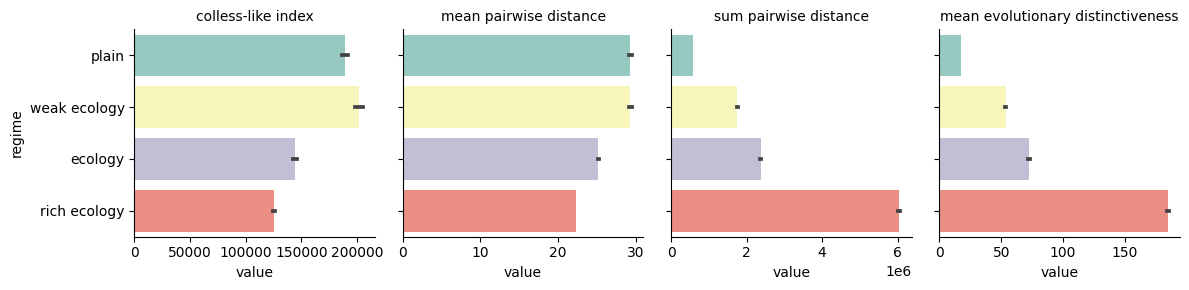

teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png


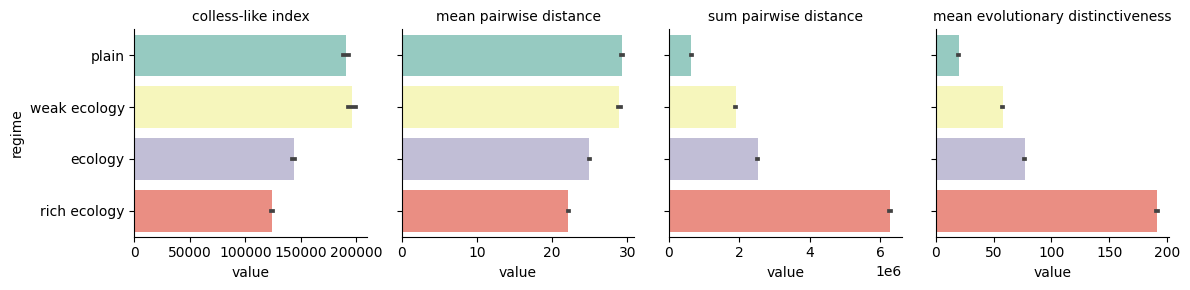

teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png


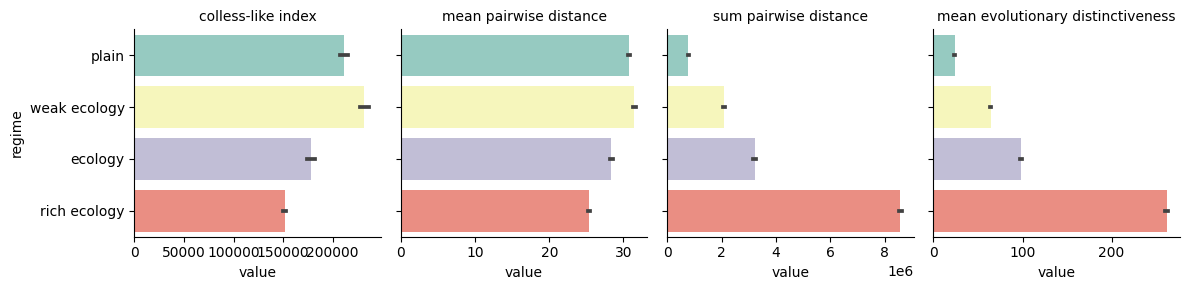

teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png


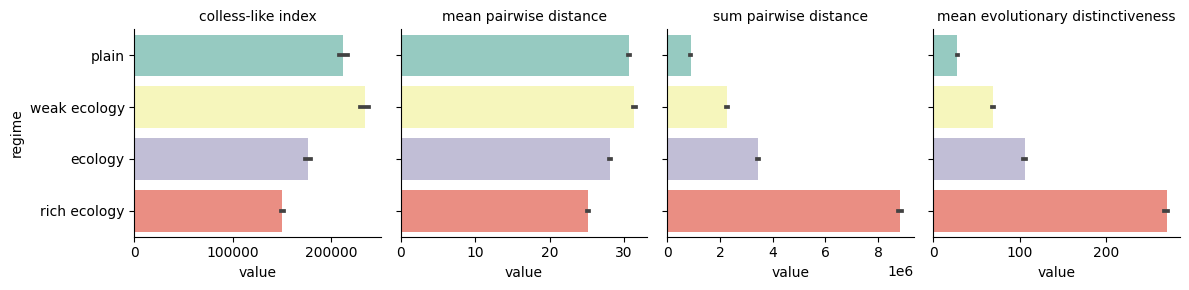

teeplots/col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png


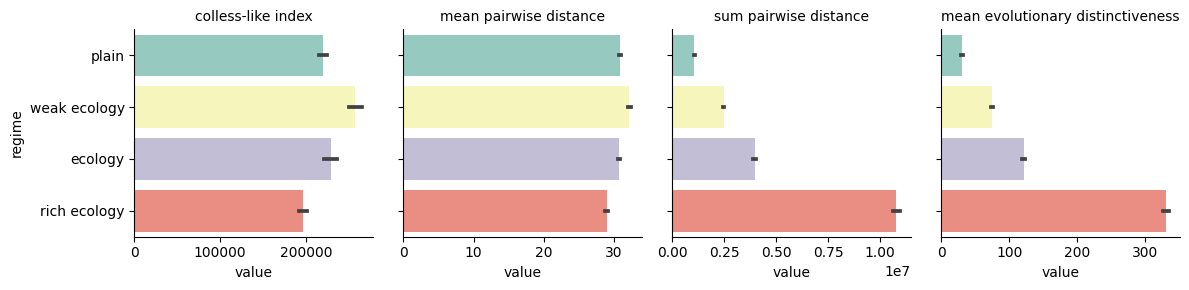

teeplots/col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png


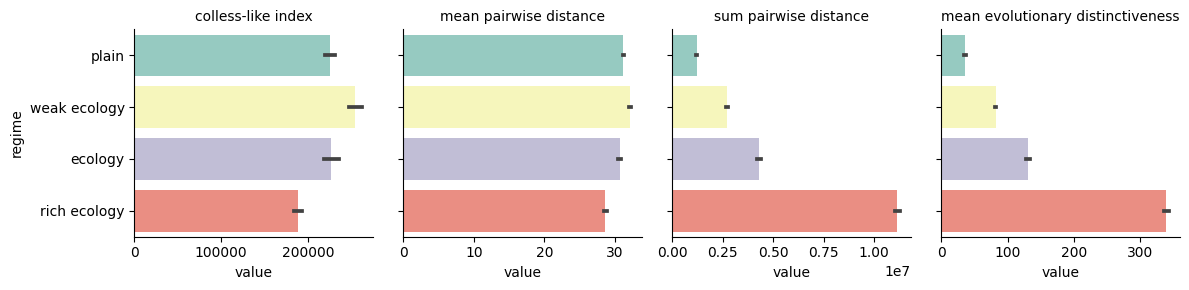

teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.png


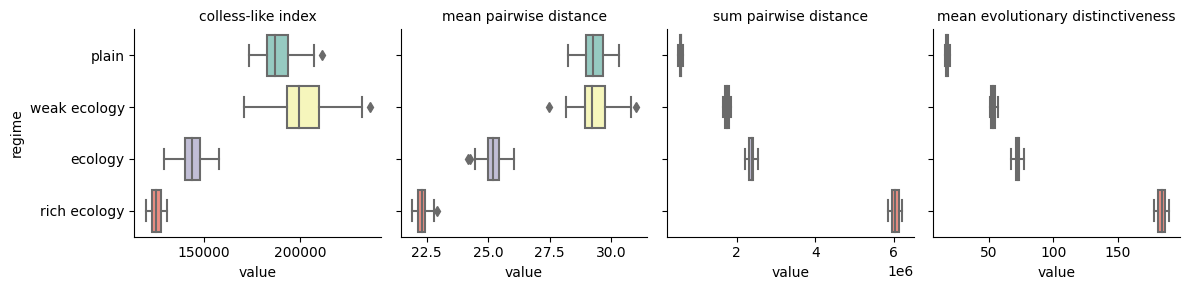

teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.png


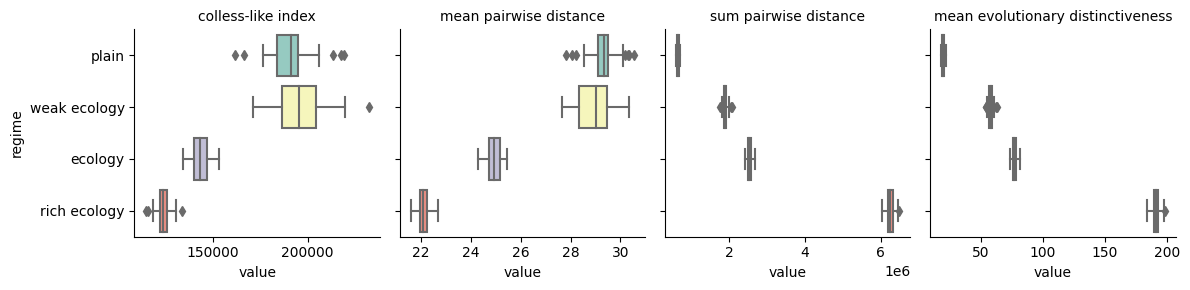

teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.png


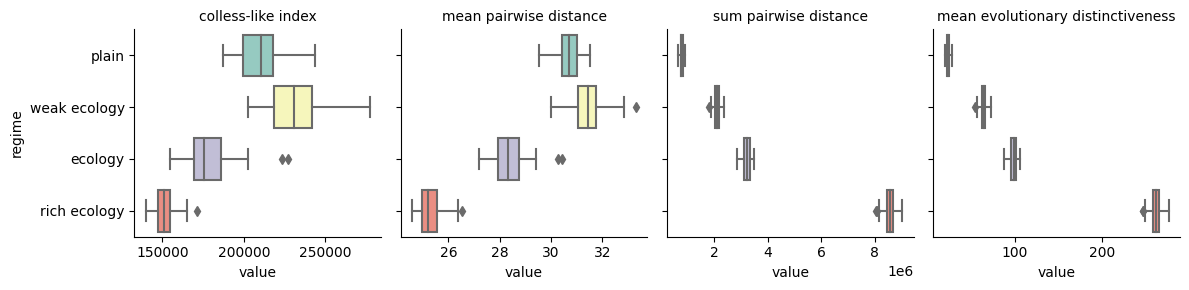

teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.png


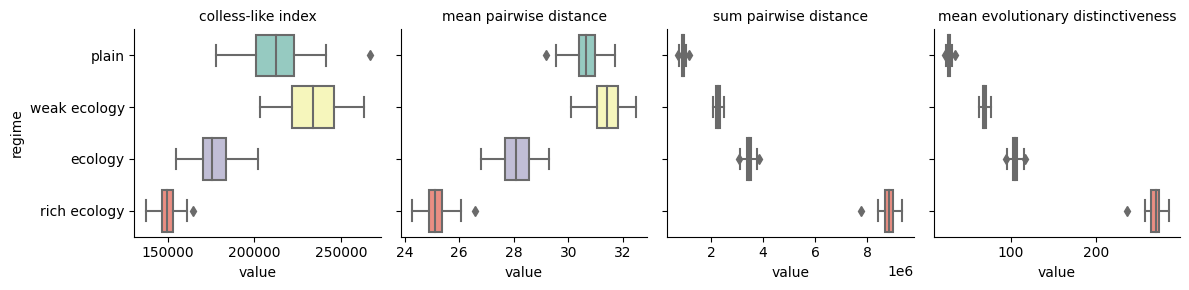

teeplots/col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.png


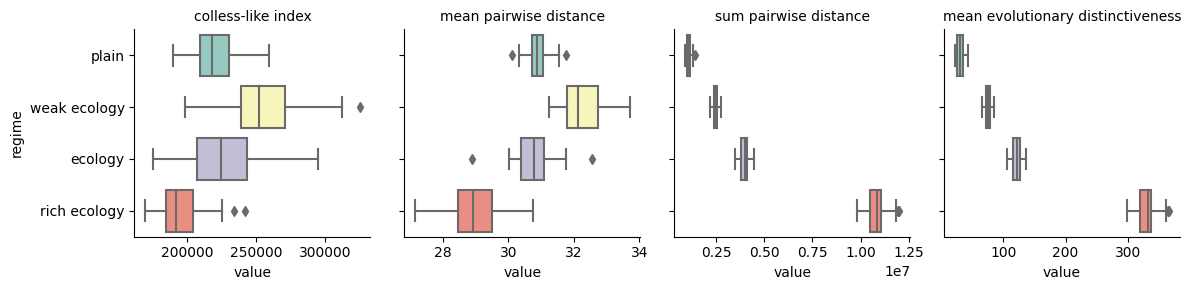

teeplots/col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.png


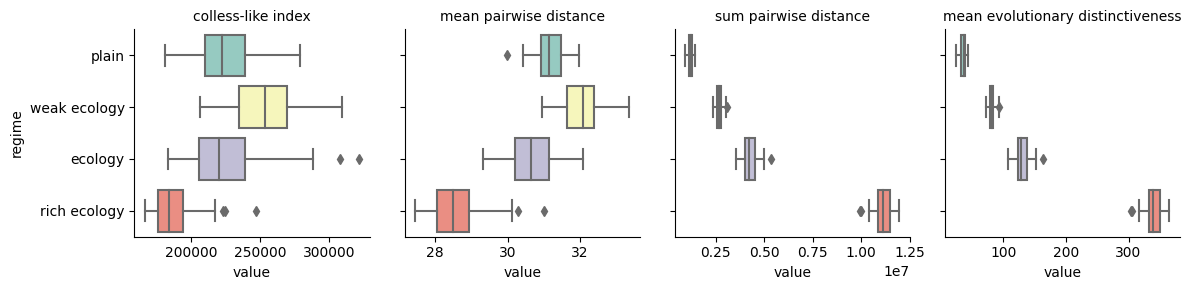

teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.png


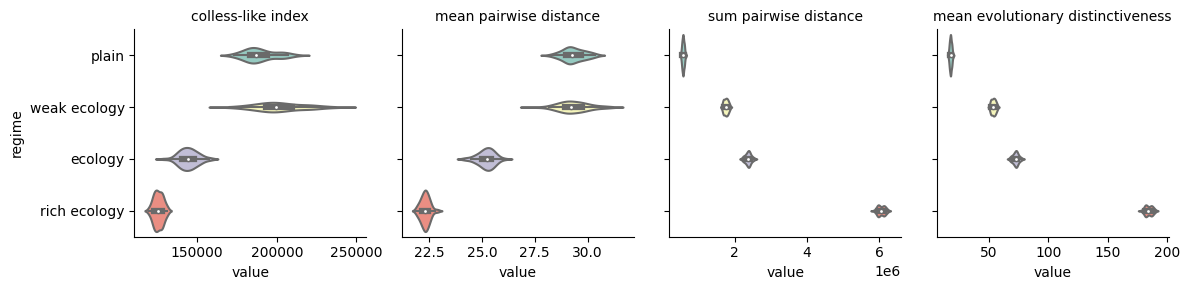

teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.png


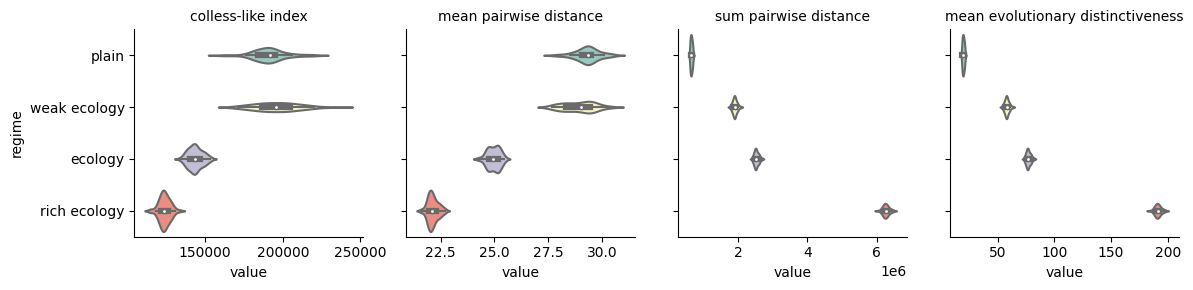

teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.png


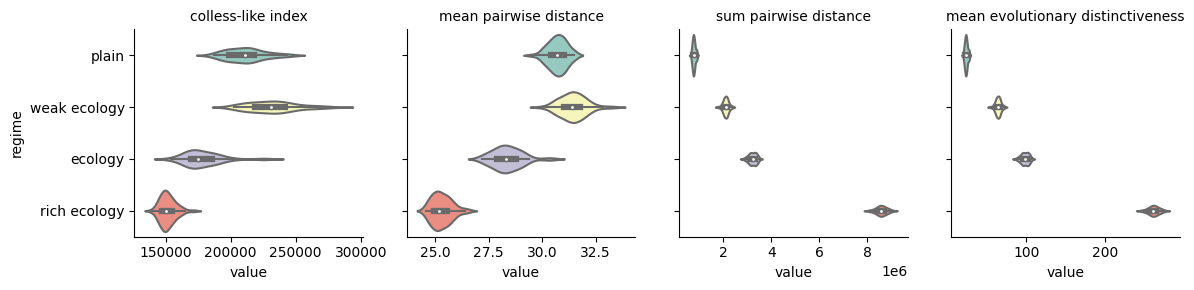

teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.png


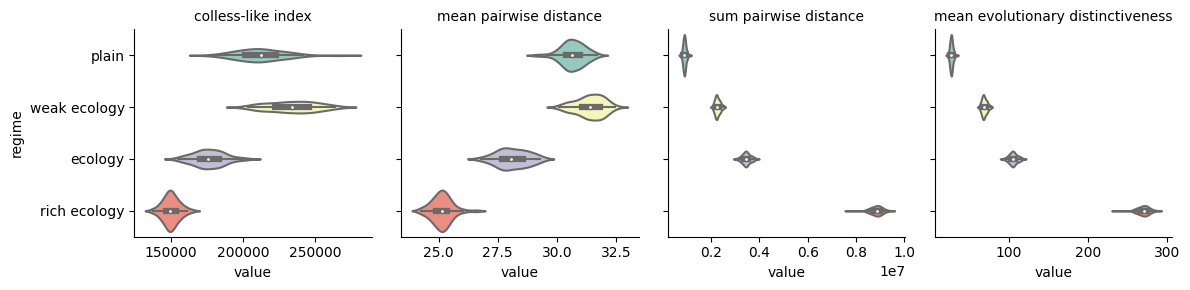

teeplots/col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.png


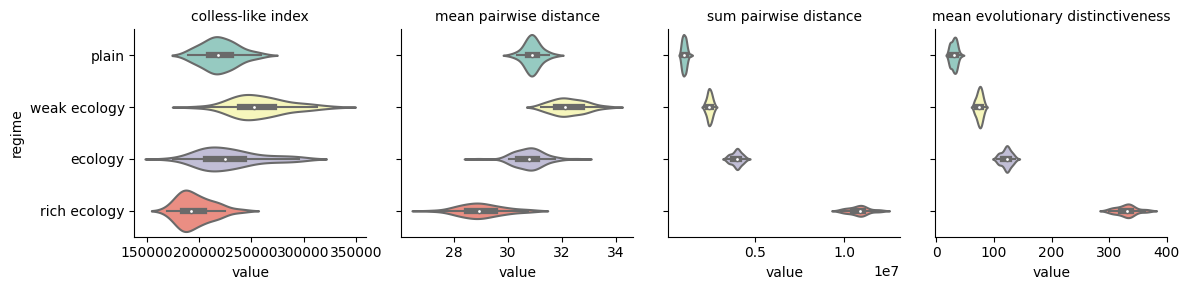

teeplots/col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.png


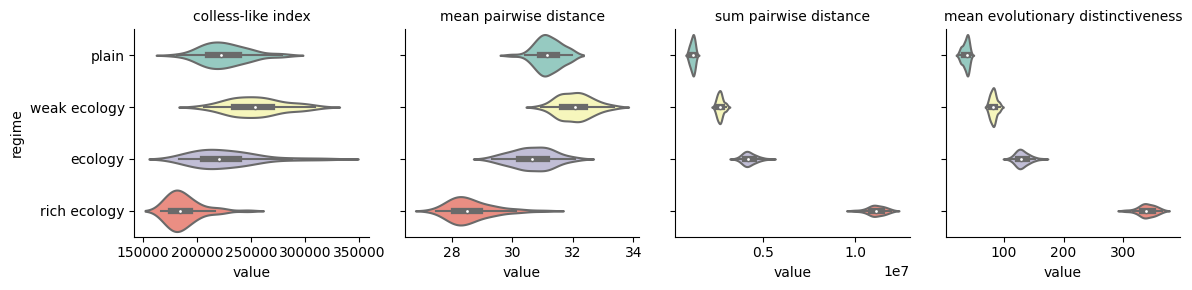

In [18]:
def make_do_plot(plotter):
    def do_plot(data, col, x, y):
        g = sns.FacetGrid(
            data,
            col=col,
            sharex=False,
        ).set_titles(template="{col_name}")
        g.map(
            plotter,
            x,
            y,
            order=[
                "plain",
                "weak ecology",
                "ecology",
                "rich ecology",
            ],
            palette=sns.color_palette("Set3", 4),
        )

    return do_plot


for viz, (group, group_df) in it.product(
    [
        sns.barplot,
        sns.boxplot,
        sns.violinplot,
    ],
    melted_df.groupby(sensitivity_analysis_variables),
):
    do_plot = make_do_plot(viz)
    do_plot.__name__ = viz.__name__
    tp.tee(
        do_plot,
        data=group_df,
        col="phylometric",
        x="value",
        y="regime",
        teeplot_outattrs={
            **{
                "nuisance": "spatial-structure",
            },
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
        },
    )


teeplots/epoch=0+mut_distn=np.random.exponential+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=0+mut_distn=np.random.exponential+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.png


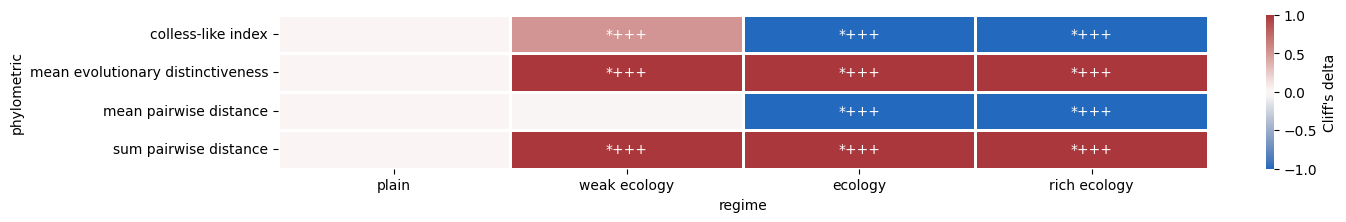

teeplots/epoch=0+mut_distn=np.random.standard_normal+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=0+mut_distn=np.random.standard_normal+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.png


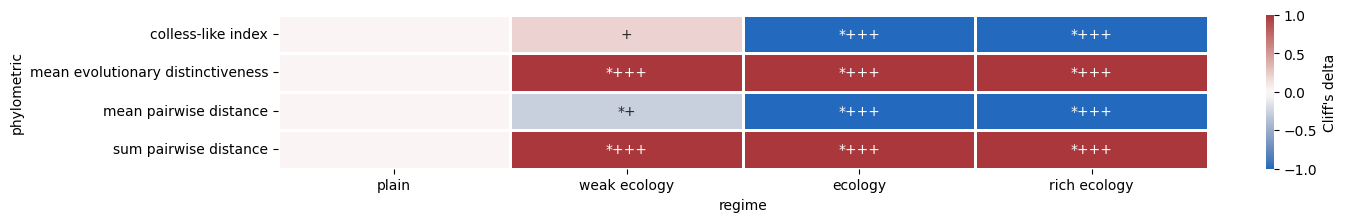

teeplots/epoch=2+mut_distn=np.random.exponential+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=2+mut_distn=np.random.exponential+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.png


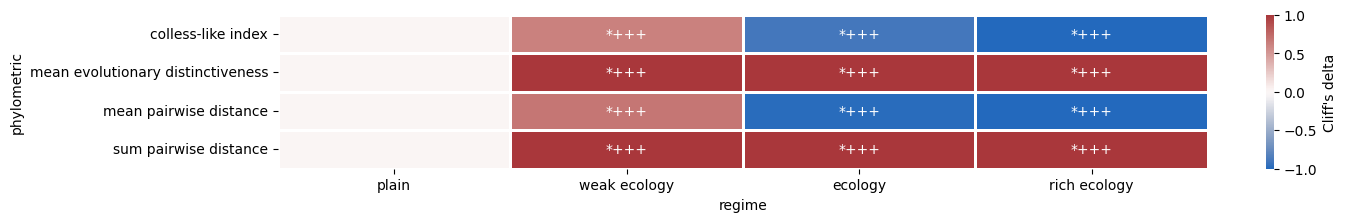

teeplots/epoch=2+mut_distn=np.random.standard_normal+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=2+mut_distn=np.random.standard_normal+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.png


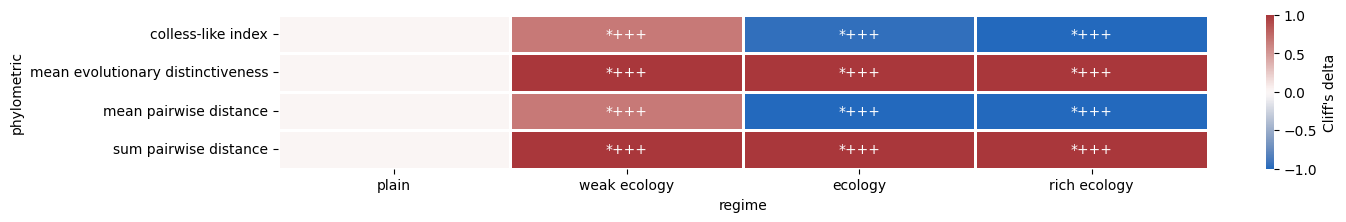

teeplots/epoch=7+mut_distn=np.random.exponential+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=7+mut_distn=np.random.exponential+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.png


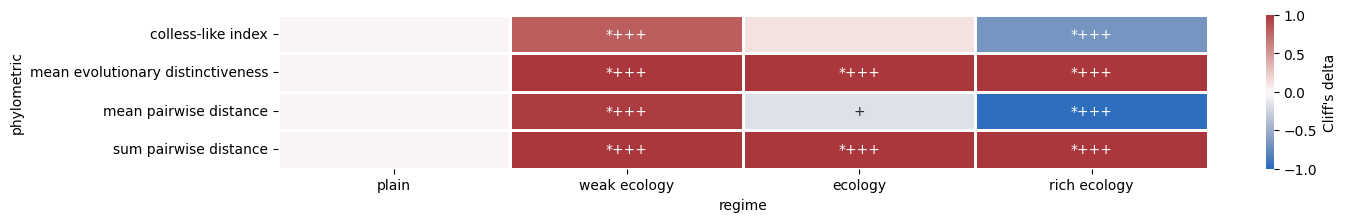

teeplots/epoch=7+mut_distn=np.random.standard_normal+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=7+mut_distn=np.random.standard_normal+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.png


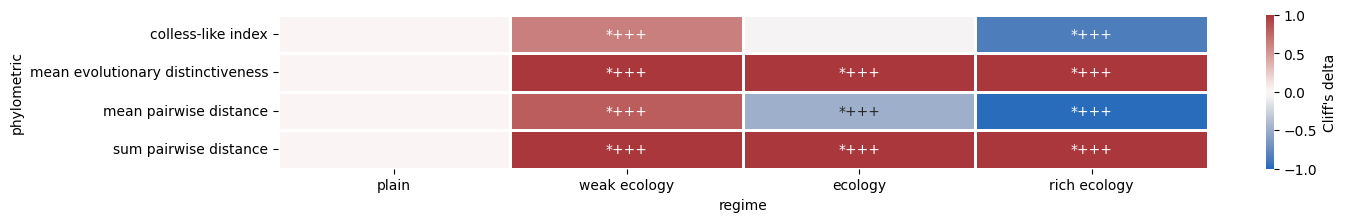

In [19]:
for (group, group_df) in df.groupby(sensitivity_analysis_variables):

    fil = (
        group_df[(group_df["a"] == "collapsed-phylogeny")]
        .copy()
        .dropna(subset=["regime"])
    )

    melted_df = fil.melt(
        id_vars=["regime"],
        value_vars=phylometrics,
    )
    melted_df["phylometric"] = melted_df["variable"]

    def calc_cliffs_delta(group) -> float:
        phylometric, regime = group.name
        return -cliffs_delta(
            fil[fil["regime"] == "plain"][phylometric],
            fil[fil["regime"] == regime][phylometric],
        )[0]

    melted_df = melted_df.groupby(["phylometric", "regime"]).apply(
        calc_cliffs_delta,
    ).reset_index(name="value")

    fig, ax = plt.subplots(figsize=(15, 2))

    matrix = melted_df.pivot(
        index="phylometric",
        columns="regime",
        values="value",
    )
    matrix = matrix[
        sorted(
            matrix.columns,
            key=[
                "plain",
                "weak ecology",
                "ecology",
                "rich ecology",
            ].index,
        )
    ]

    annot = []
    for metric, row in matrix.iterrows():

        def getvec(regime: str) -> np.array:
            return fil[fil["regime"] == regime][metric].to_numpy()

        annot.append(
            [
                describe_effect(getvec("plain"), getvec(regime))
                for regime in matrix.columns
            ],
        )

    tp.tee(
        sns.heatmap,
        matrix,
        annot=annot,
        fmt="",
        linewidths=2,
        cmap=sns.color_palette("vlag", as_cmap=True),
        center=0,
        cbar_kws={"label": "Cliff's delta"},
        teeplot_outattrs={
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
            **{
                "x": "regime",
                "y": "phylometric",
            },
            "spatial": "true",
        },
        teeplot_outexclude=["fmt"],
        vmin=-1,
        vmax=1,
    )


# stats: kruskal wallace among regimes


In [20]:
records = []
for phylometric in phylometrics:
    for group, group_df in df[(df["a"] == "collapsed-phylogeny")].groupby(
        sensitivity_analysis_variables,
        as_index=False,
    ):
        kw_result, n = scipy_stats.kruskal(
            *(
                quality_series
                for quality, quality_series in group_df.groupby(["regime"])[
                    phylometric
                ]
            )
        ), min(group_df.groupby(["regime"]).count()["a"])
        records.append(
            {
                **{
                    "n": n,
                    "N": len([*group_df.groupby(["regime"])]),
                    "phylometric": phylometric,
                },
                **dict(zip(["statistic", "p"], kw_result)),
                **dict(zip(sensitivity_analysis_variables, group)),
            }
        )

with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    out_df = (
        pd.DataFrame.from_records(records)
        .sort_values(
            sensitivity_analysis_variables,
        )
        .reset_index(drop=True)
    )
    display(out_df)
    os.makedirs("outdata", exist_ok=True)
    out_df.to_csv(
        "outdata/a=phylostatistics-comparison-between-regimes-spatial-nuisance-kwallis+ext=.csv",
        index=False,
    )


n  N                        phylometric   statistic             p  epoch  \
0   50  4                 colless-like index  172.713564  3.302345e-37      0   
1   50  4             mean pairwise distance  167.921194  3.576287e-36      0   
2   50  4              sum pairwise distance  186.567164  3.366062e-40      0   
3   50  4  mean evolutionary distinctiveness  186.567164  3.366062e-40      0   
4   50  4                 colless-like index  168.730078  2.392307e-36      0   
5   50  4             mean pairwise distance  169.356466  1.752241e-36      0   
6   50  4              sum pairwise distance  186.567164  3.366062e-40      0   
7   50  4  mean evolutionary distinctiveness  186.567164  3.366062e-40      0   
8   50  4                 colless-like index  167.439630  4.543457e-36      2   
9   50  4             mean pairwise distance  175.699248  7.484610e-38      2   
10  50  4              sum pairwise distance  186.567164  3.366062e-40      2   
11  50  4  mean evolutionary distinctiveness  186.567164  3.366062e-40      2   
12  50  4                 colless-like index  173.646030  2.077285e-37      2   
13  50  4             mean pairwise distance  175.873540  6.863331e-38      2   
14  50  4              sum pairwise distance  186.567164  3.366062e-40      2   
15  50  4  mean evolutionary distinctiveness  186.567164  3.366062e-40      2   
16  50  4                 colless-like index  103.023940  3.476966e-22      7   
17  50  4             mean pairwise distance  156.732048  9.296771e-34      7   
18  50  4              sum pairwise distance  186.567164  3.366062e-40      7   
19  50  4  mean evolutionary distinctiveness  186.567164  3.366062e-40      7   
20  50  4                 colless-like index  108.658758  2.132878e-23      7   
21  50  4             mean pairwise distance  154.969254  2.231993e-33      7   
22  50  4              sum pairwise distance  186.567164  3.366062e-40      7   
23  50  4  mean evolutionary distinctiveness  186.567164  3.366062e-40      7   

                    mut_distn  
0       np.random.exponential  
1       np.random.exponential  
2       np.random.exponential  
3       np.random.exponential  
4   np.random.standard_normal  
5   np.random.standard_normal  
6   np.random.standard_normal  
7   np.random.standard_normal  
8       np.random.exponential  
9       np.random.exponential  
10      np.random.exponential  
11      np.random.exponential  
12  np.random.standard_normal  
13  np.random.standard_normal  
14  np.random.standard_normal  
15  np.random.standard_normal  
16      np.random.exponential  
17      np.random.exponential  
18      np.random.exponential  
19      np.random.exponential  
20  np.random.standard_normal  
21  np.random.standard_normal  
22  np.random.standard_normal  
23  np.random.standard_normal

In [21]:
records = []
for phylometric in phylometrics:
    for group, group_df in df[(df["a"] == "collapsed-phylogeny")].groupby(
        sensitivity_analysis_variables, as_index=False
    ):
        for regime1, regime2 in it.combinations(
            group_df["regime"].unique(), 2
        ):
            kw_result, n = scipy_stats.wilcoxon(
                *zip(
                    *zip(
                        group_df[group_df["regime"] == regime1][phylometric],
                        group_df[group_df["regime"] == regime2][phylometric],
                    )
                ),
            ), min(group_df.groupby(["regime"]).count()["a"])
            records.append(
                {
                    **{
                        "regime1": regime1,
                        "regime2": regime2,
                        "n": n,
                        "phylometric": phylometric,
                    },
                    **dict(zip(["statistic", "p"], kw_result)),
                    **dict(zip(sensitivity_analysis_variables, group)),
                }
            )

with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    out_df = (
        pd.DataFrame.from_records(records)
        .sort_values(
            [*sensitivity_analysis_variables, "regime1", "regime2"],
        )
        .reset_index(drop=True)
    )
    display(out_df)
    os.makedirs("outdata", exist_ok=True)
    out_df.to_csv(
        "outdata/a=phylostatistics-comparison-between-regimes-allpairs-spatial-nuisance-wilcox+ext=.csv",
        index=False,
    )


regime1       regime2   n                        phylometric  \
0         ecology         plain  50                 colless-like index   
1         ecology         plain  50             mean pairwise distance   
2         ecology         plain  50              sum pairwise distance   
3         ecology         plain  50  mean evolutionary distinctiveness   
4         ecology  rich ecology  50                 colless-like index   
5         ecology  rich ecology  50             mean pairwise distance   
6         ecology  rich ecology  50              sum pairwise distance   
7         ecology  rich ecology  50  mean evolutionary distinctiveness   
8         ecology  weak ecology  50                 colless-like index   
9         ecology  weak ecology  50             mean pairwise distance   
10        ecology  weak ecology  50              sum pairwise distance   
11        ecology  weak ecology  50  mean evolutionary distinctiveness   
12          plain  rich ecology  50                 colless-like index   
13          plain  rich ecology  50             mean pairwise distance   
14          plain  rich ecology  50              sum pairwise distance   
15          plain  rich ecology  50  mean evolutionary distinctiveness   
16   weak ecology         plain  50                 colless-like index   
17   weak ecology         plain  50             mean pairwise distance   
18   weak ecology         plain  50              sum pairwise distance   
19   weak ecology         plain  50  mean evolutionary distinctiveness   
20   weak ecology  rich ecology  50                 colless-like index   
21   weak ecology  rich ecology  50             mean pairwise distance   
22   weak ecology  rich ecology  50              sum pairwise distance   
23   weak ecology  rich ecology  50  mean evolutionary distinctiveness   
24          plain       ecology  50                 colless-like index   
25          plain       ecology  50             mean pairwise distance   
26          plain       ecology  50              sum pairwise distance   
27          plain       ecology  50  mean evolutionary distinctiveness   
28          plain  rich ecology  50                 colless-like index   
29          plain  rich ecology  50             mean pairwise distance   
30          plain  rich ecology  50              sum pairwise distance   
31          plain  rich ecology  50  mean evolutionary distinctiveness   
32          plain  weak ecology  50                 colless-like index   
33          plain  weak ecology  50             mean pairwise distance   
34          plain  weak ecology  50              sum pairwise distance   
35          plain  weak ecology  50  mean evolutionary distinctiveness   
36   rich ecology       ecology  50                 colless-like index   
37   rich ecology       ecology  50             mean pairwise distance   
38   rich ecology       ecology  50              sum pairwise distance   
39   rich ecology       ecology  50  mean evolutionary distinctiveness   
40   rich ecology  weak ecology  50                 colless-like index   
41   rich ecology  weak ecology  50             mean pairwise distance   
42   rich ecology  weak ecology  50              sum pairwise distance   
43   rich ecology  weak ecology  50  mean evolutionary distinctiveness   
44   weak ecology       ecology  50                 colless-like index   
45   weak ecology       ecology  50             mean pairwise distance   
46   weak ecology       ecology  50              sum pairwise distance   
47   weak ecology       ecology  50  mean evolutionary distinctiveness   
48        ecology  weak ecology  50                 colless-like index   
49        ecology  weak ecology  50             mean pairwise distance   
50        ecology  weak ecology  50              sum pairwise distance   
51        ecology  weak ecology  50  mean evolutionary distinctiveness   
52          plain       ecology  50                 colless-like index   
53          pl

# reconstructed phylogenetic data


In [22]:
df["quality"] = df.apply(
    lambda row: {
        ("reconstructed-tree", 3.0): "33% resolution",
        ("reconstructed-tree", 10.0): "10% resolution",
        ("reconstructed-tree", 30.0): "3% resolution",
        ("reconstructed-tree", 100.0): "1% resolution",
        ("collapsed-phylogeny", 0): "perfect resolution",
    }.get(
        tuple(row[["a", "resolution"]].fillna(0)),
        np.nan,  # default
    ),
    axis="columns",
)
df["quality"].unique()


array(['perfect resolution', '10% resolution', '1% resolution',
       '3% resolution', '33% resolution'], dtype=object)

In [23]:
melted_df = df.melt(
    id_vars=evolutionary_variables
    + methodological_variables
    + sensitivity_analysis_variables
    + ["regime", "a", "quality"],
    value_vars=phylometrics,
)
melted_df["phylometric"] = melted_df["variable"]
melted_df


num_niches  resolution  epoch                  mut_distn        regime  \
0               4         NaN      7  np.random.standard_normal  weak ecology   
1               4         NaN      7  np.random.standard_normal  weak ecology   
2               4         NaN      7  np.random.standard_normal  weak ecology   
3               4         NaN      7  np.random.standard_normal  weak ecology   
4               4         NaN      7  np.random.standard_normal  weak ecology   
...           ...         ...    ...                        ...           ...   
23995           8         3.0      7      np.random.exponential  rich ecology   
23996           8        30.0      7      np.random.exponential  rich ecology   
23997           8       100.0      7      np.random.exponential  rich ecology   
23998           8        10.0      7      np.random.exponential  rich ecology   
23999           8        30.0      7      np.random.exponential  rich ecology   

                         a             quality  \
0      collapsed-phylogeny  perfect resolution   
1      collapsed-phylogeny  perfect resolution   
2      collapsed-phylogeny  perfect resolution   
3      collapsed-phylogeny  perfect resolution   
4      collapsed-phylogeny  perfect resolution   
...                    ...                 ...   
23995   reconstructed-tree      33% resolution   
23996   reconstructed-tree       3% resolution   
23997   reconstructed-tree       1% resolution   
23998   reconstructed-tree      10% resolution   
23999   reconstructed-tree       3% resolution   

                                variable          value  \
0                     colless-like index  269758.311432   
1                     colless-like index  245694.126217   
2                     colless-like index  229733.780163   
3                     colless-like index  233461.802088   
4                     colless-like index  262782.396217   
...                                  ...            ...   
23995  mean evolutionary distinctiveness     313.221619   
23996  mean evolutionary distinctiveness     336.758774   
23997  mean evolutionary distinctiveness     309.332581   
23998  mean evolutionary distinctiveness     305.019302   
23999  mean evolutionary distinctiveness     330.335556   

                             phylometric  
0                     colless-like index  
1                     colless-like index  
2                     colless-like index  
3                     colless-like index  
4                     colless-like index  
...                                  ...  
23995  mean evolutionary distinctiveness  
23996  mean evolutionary distinctiveness  
23997  mean evolutionary distinctiveness  
23998  mean evolutionary distinctiveness  
23999  mean evolutionary distinctiveness  

[24000 rows x 10 columns]

teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png


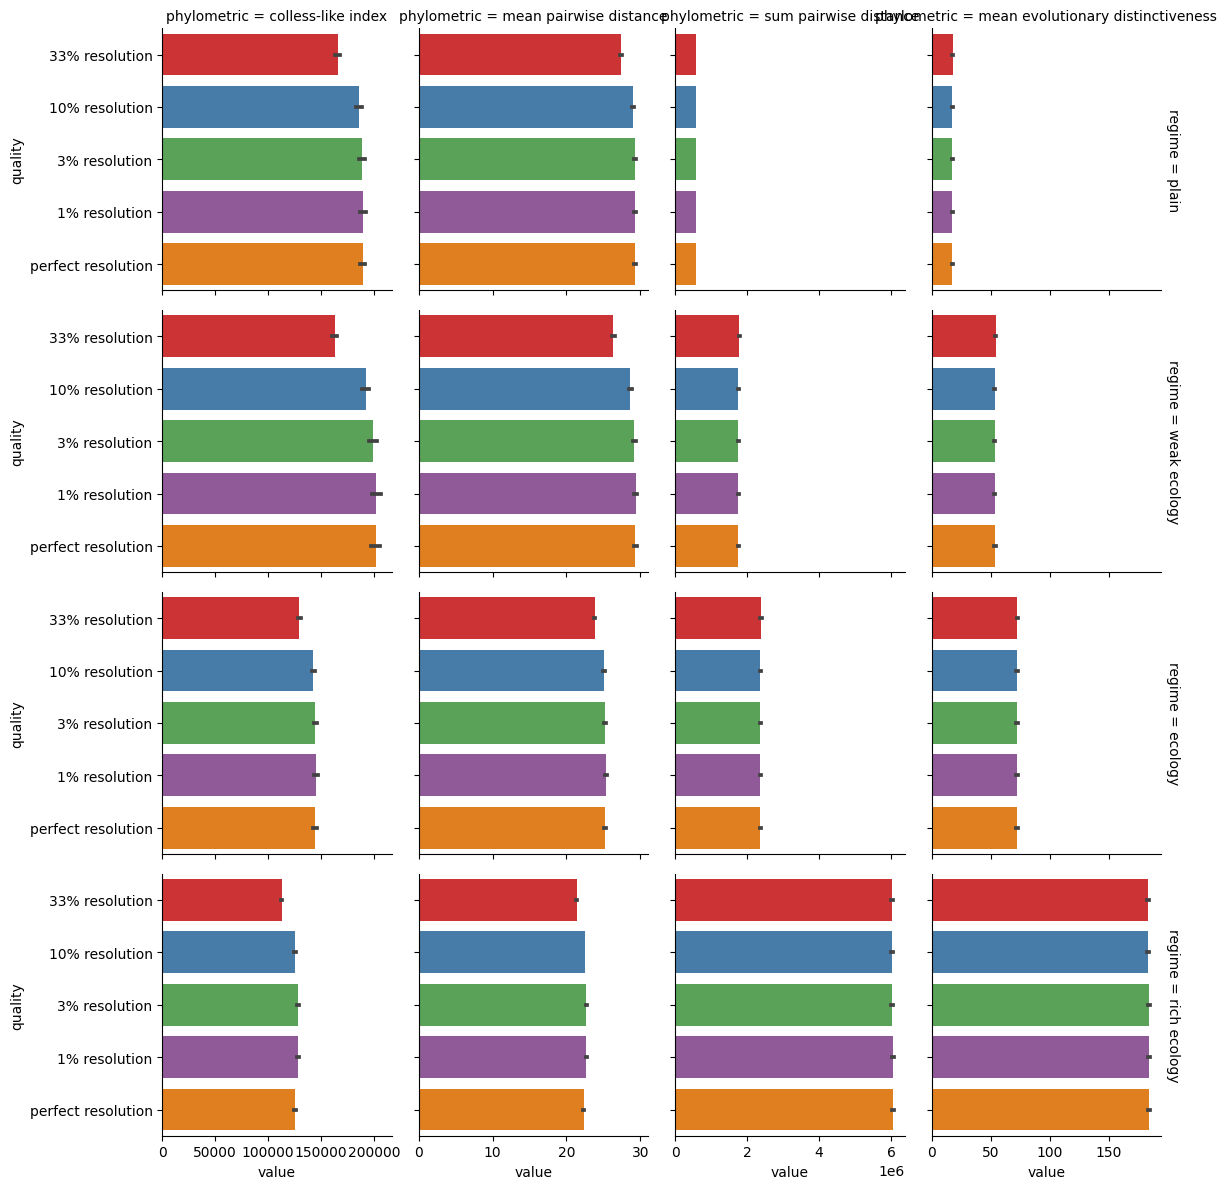

teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png


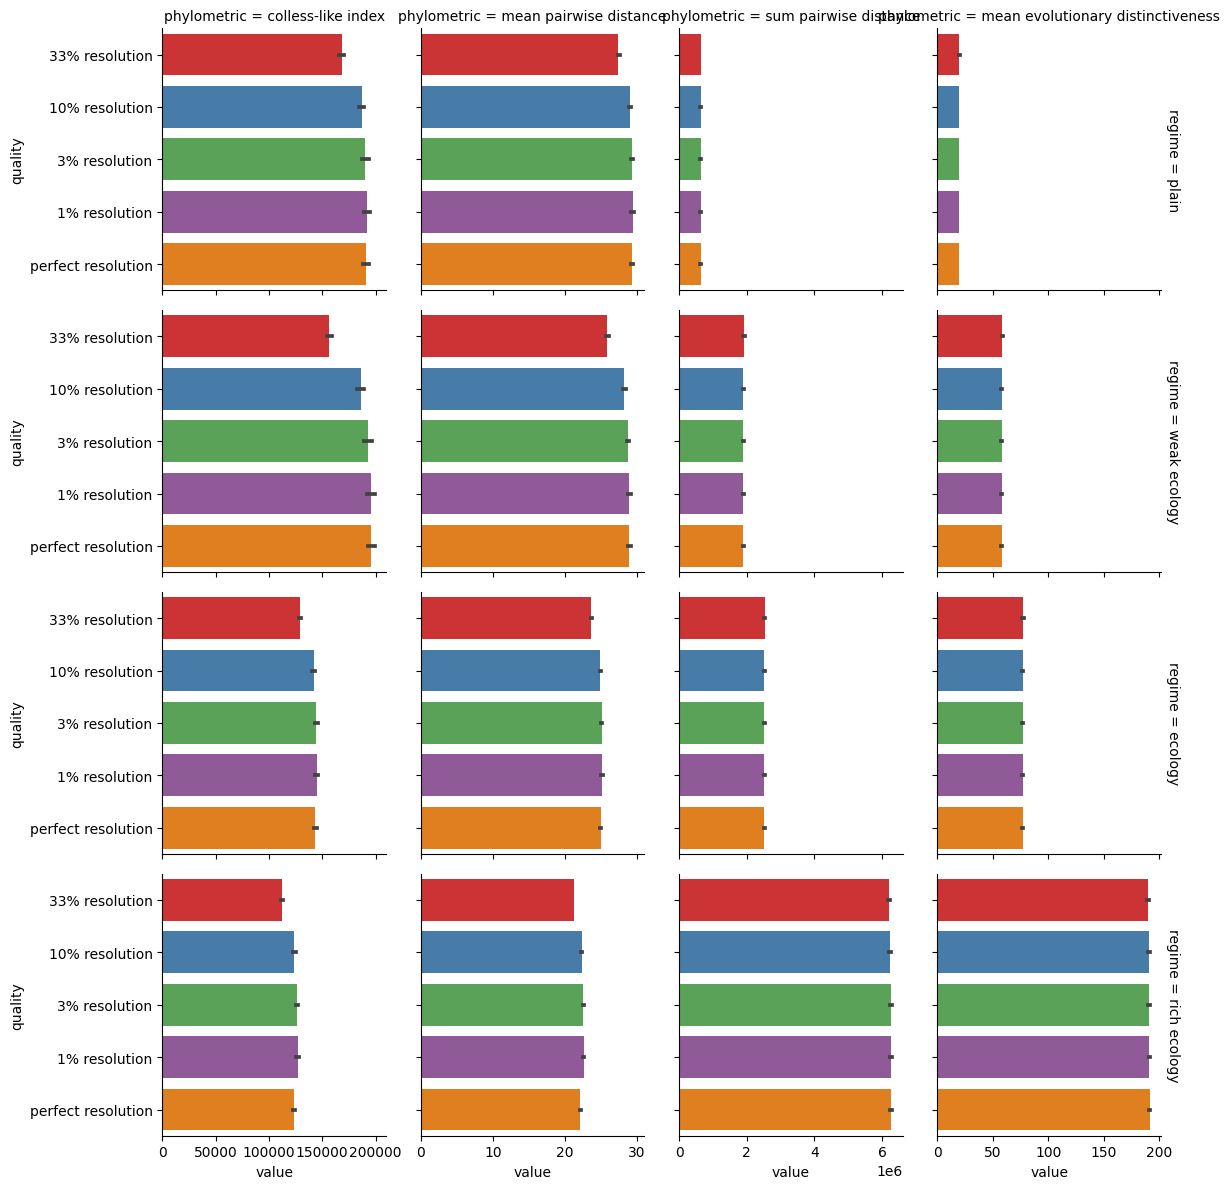

teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png


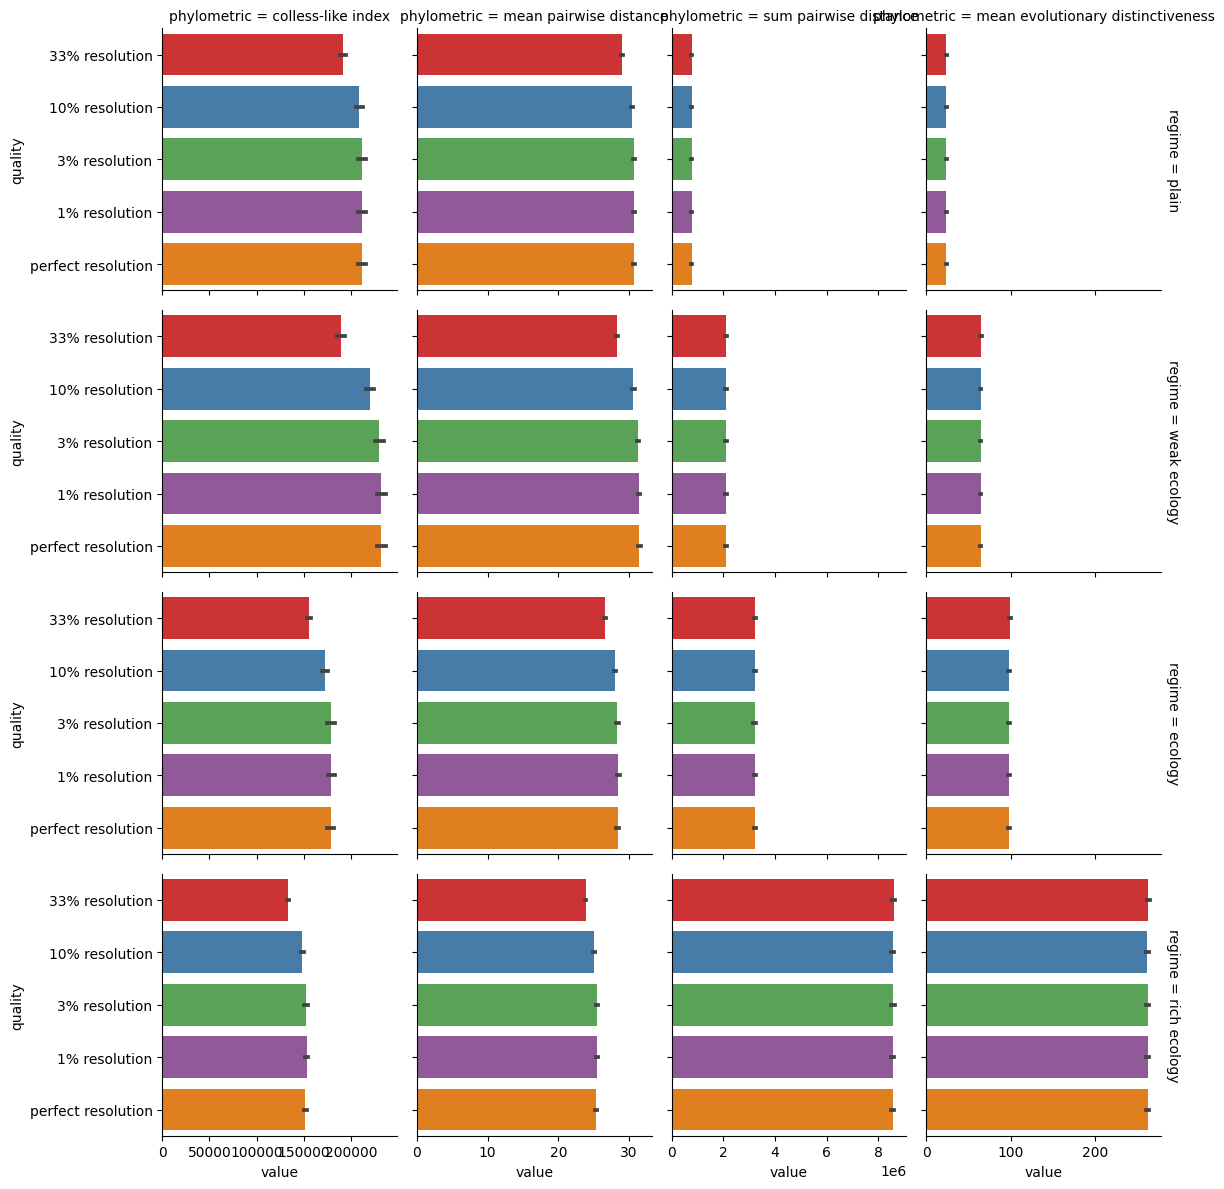

teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png


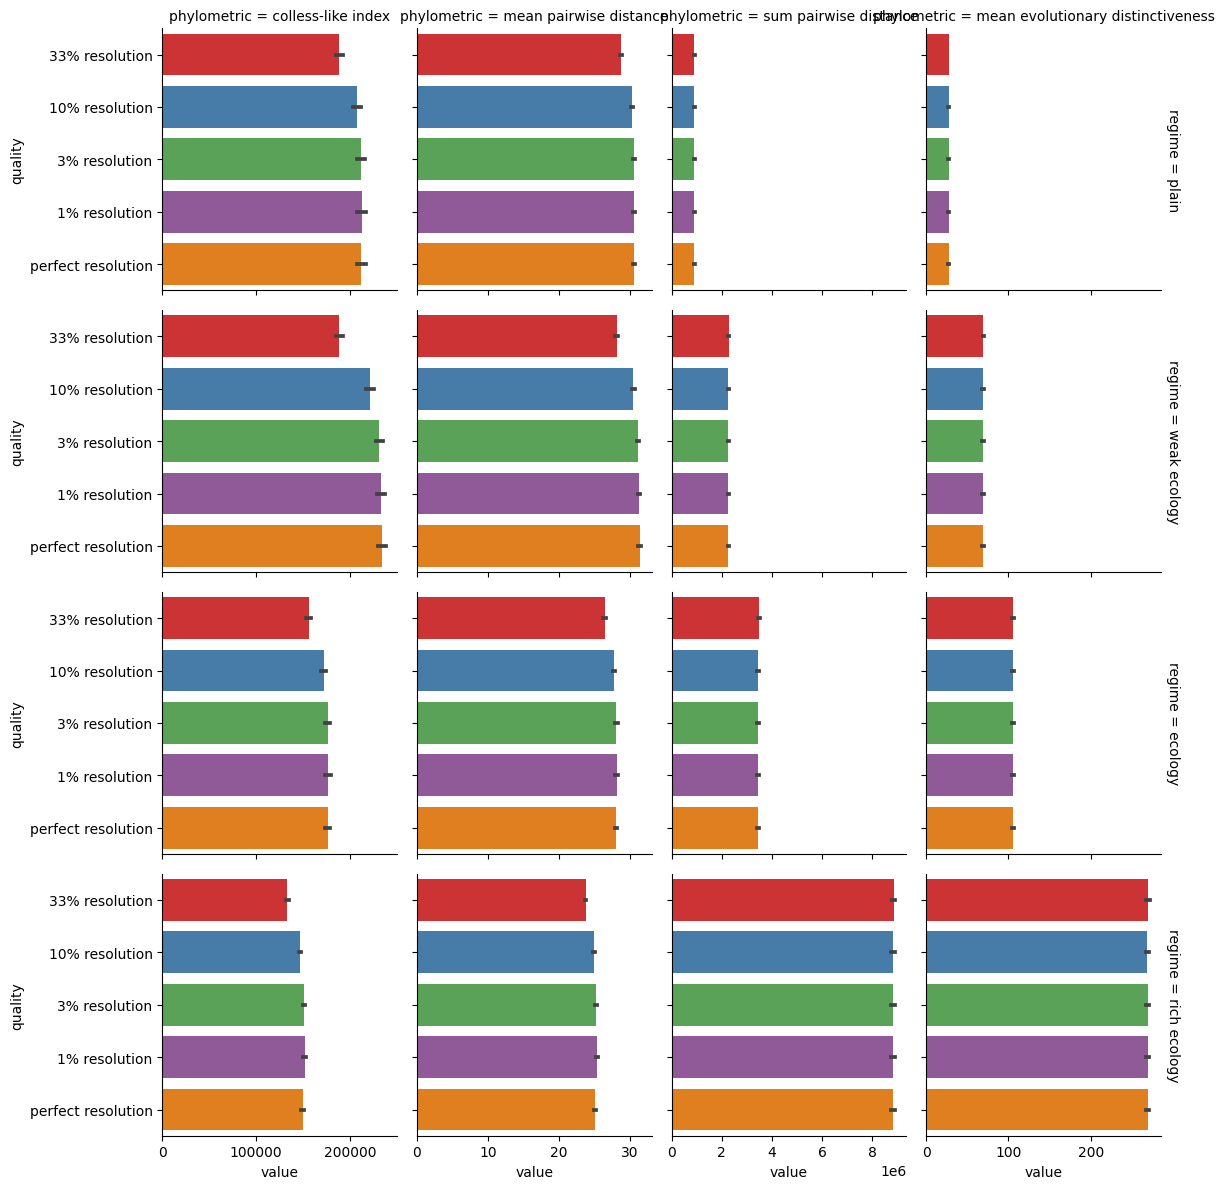

teeplots/col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png


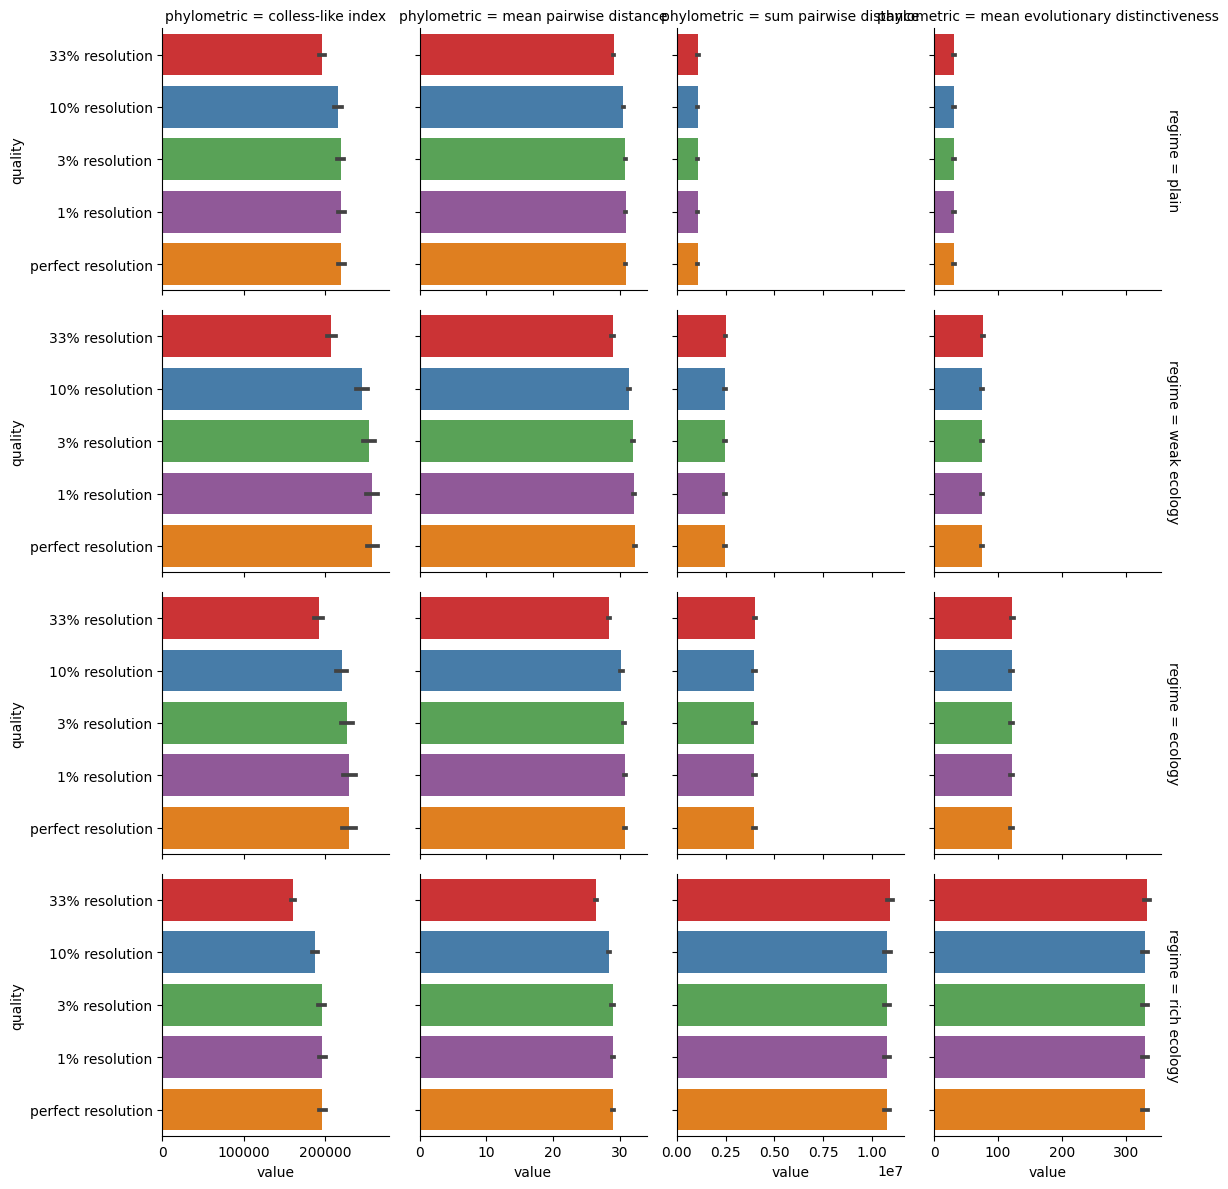

teeplots/col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png


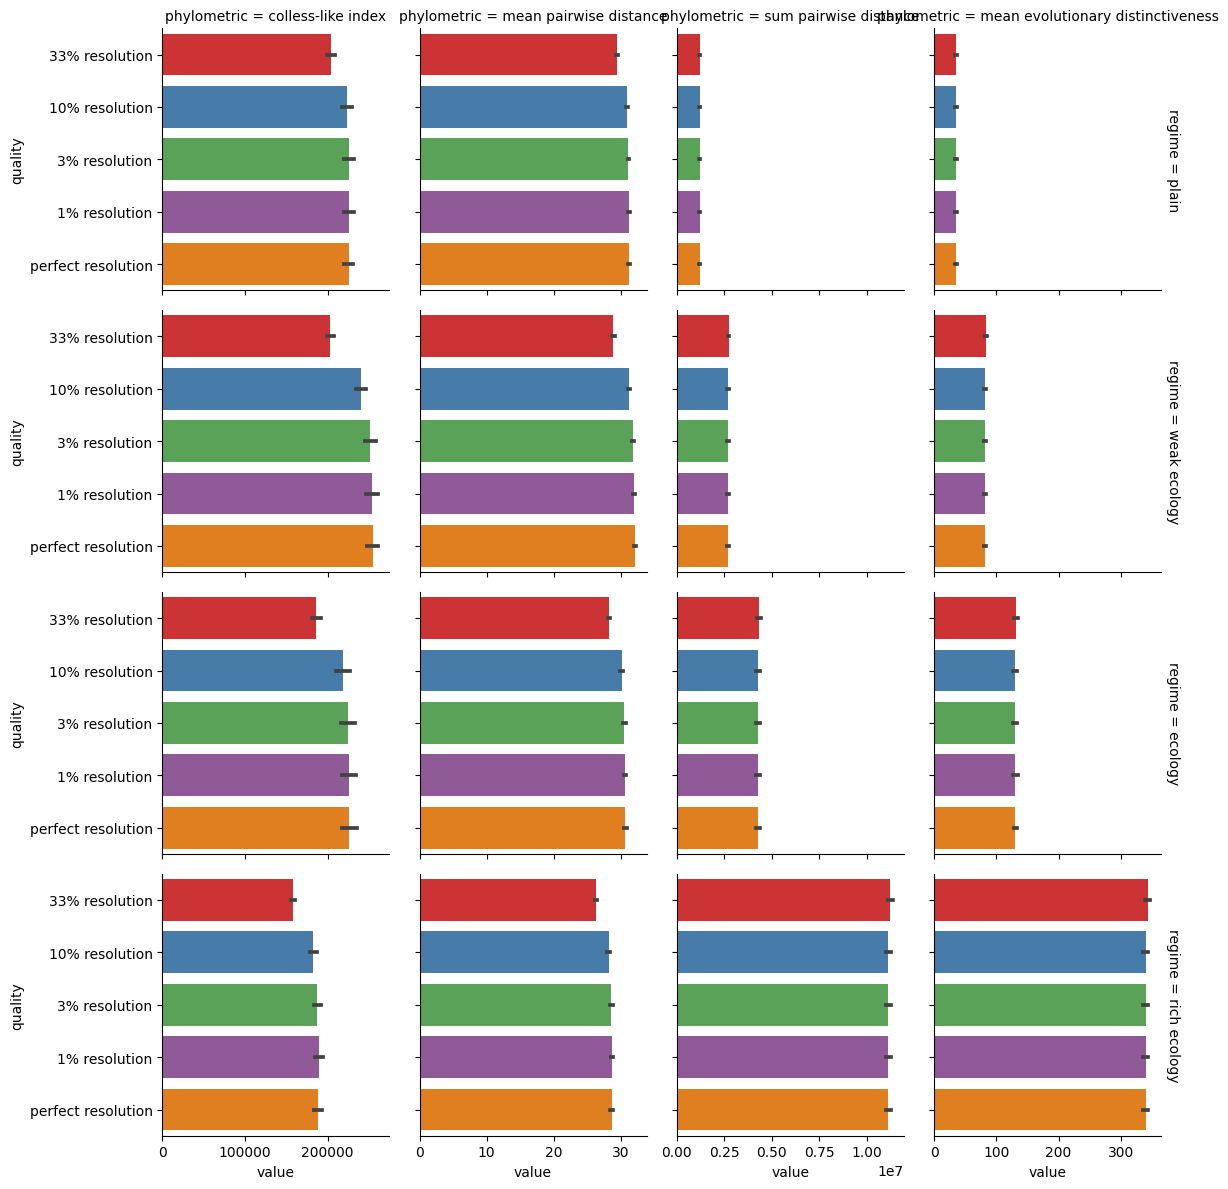

teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.png


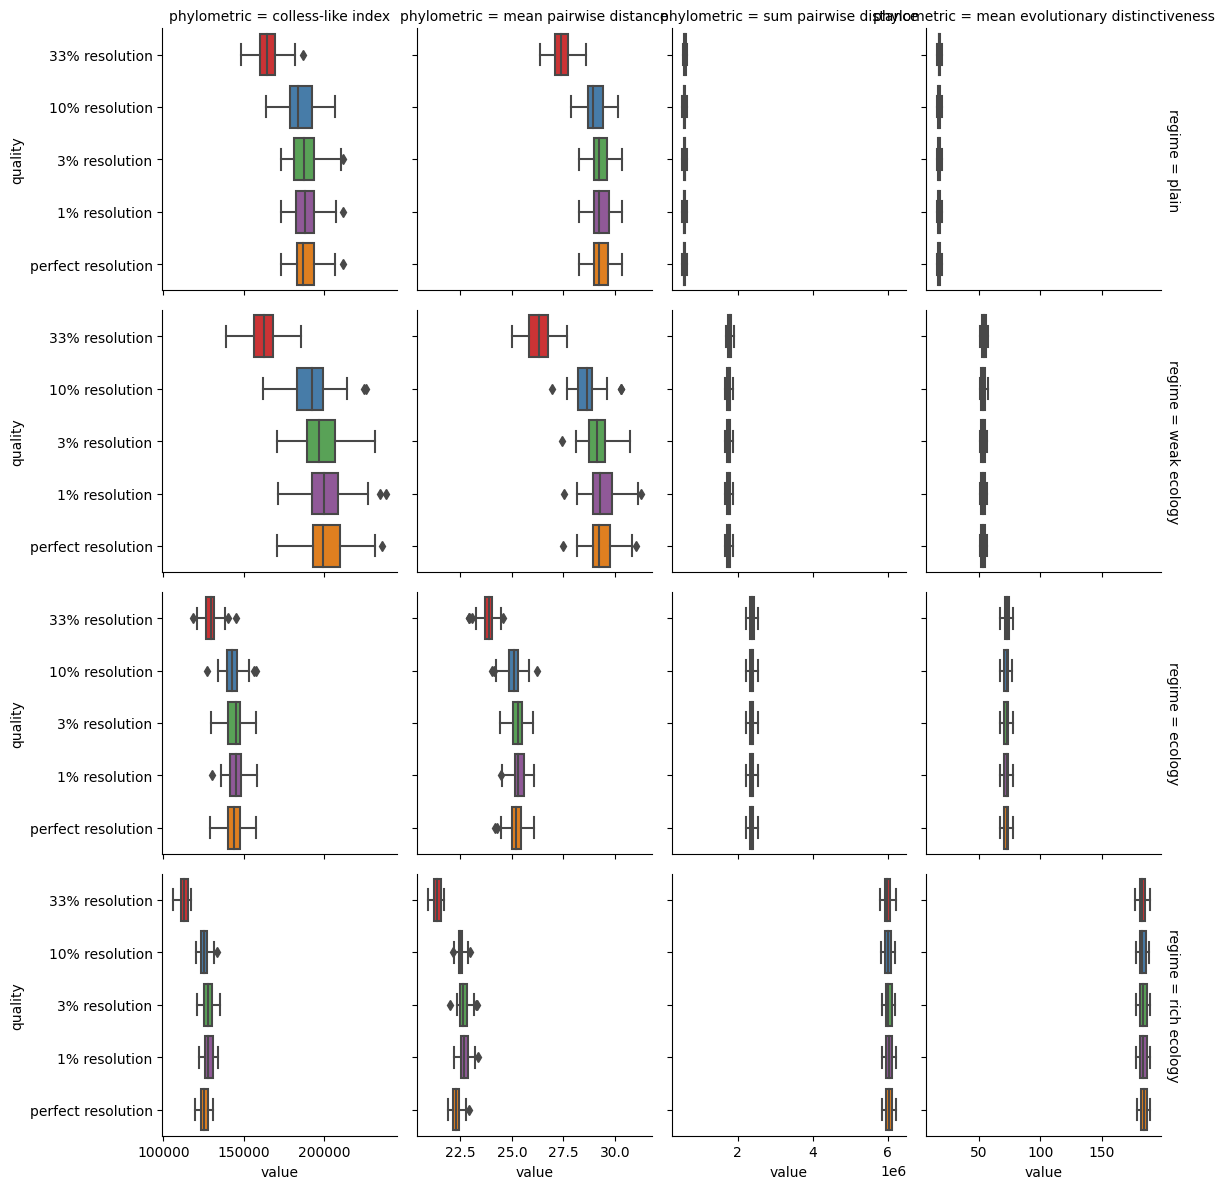

teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.png


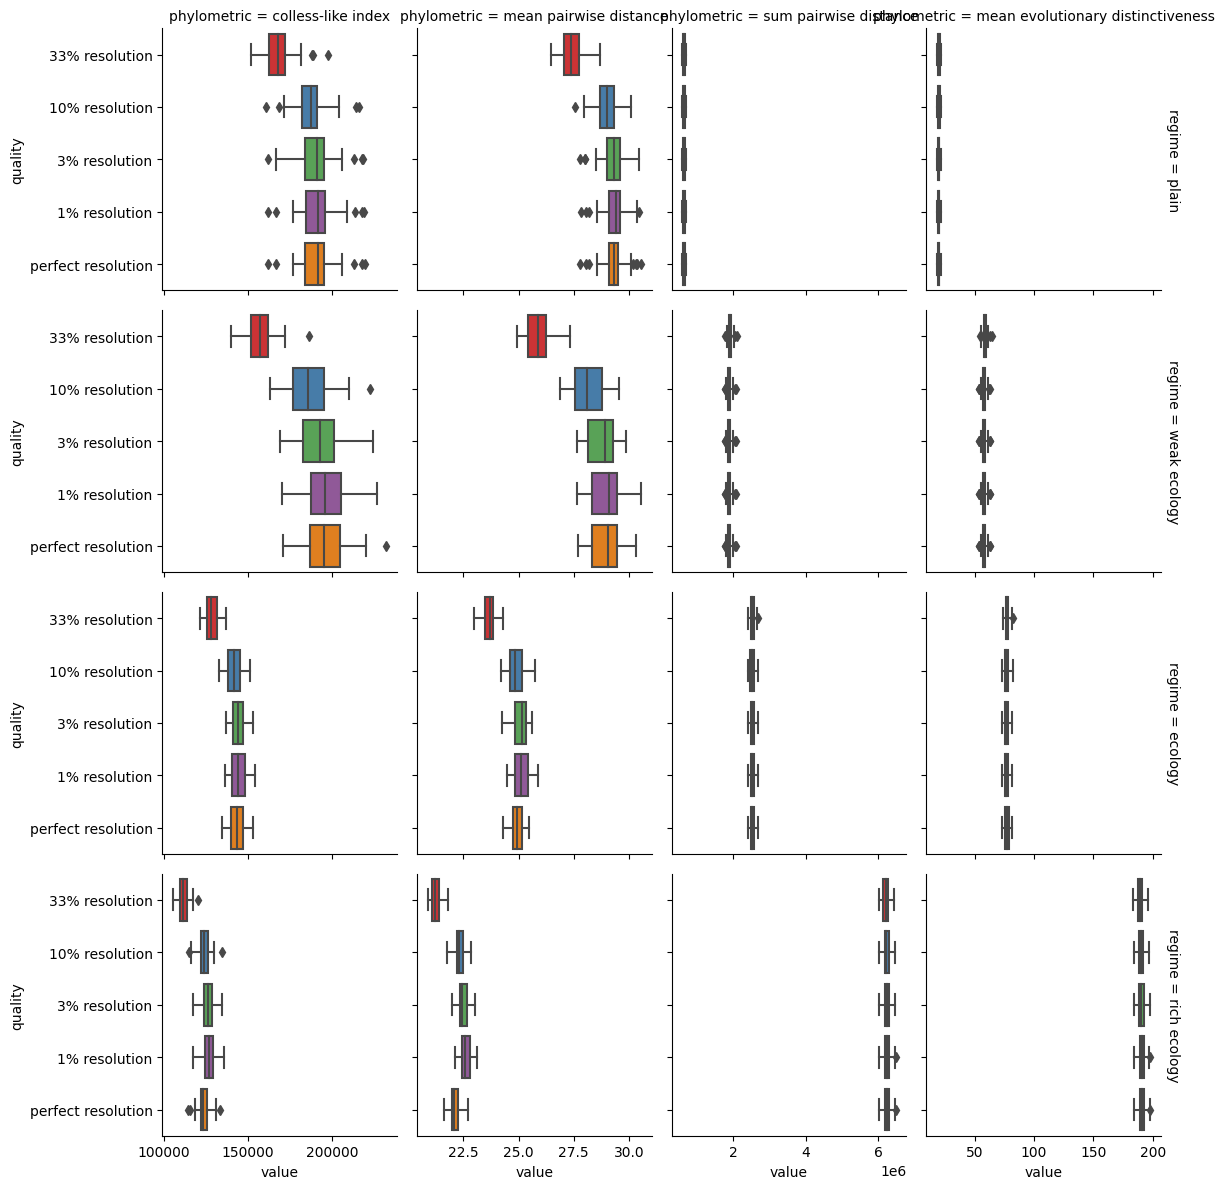

teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.png


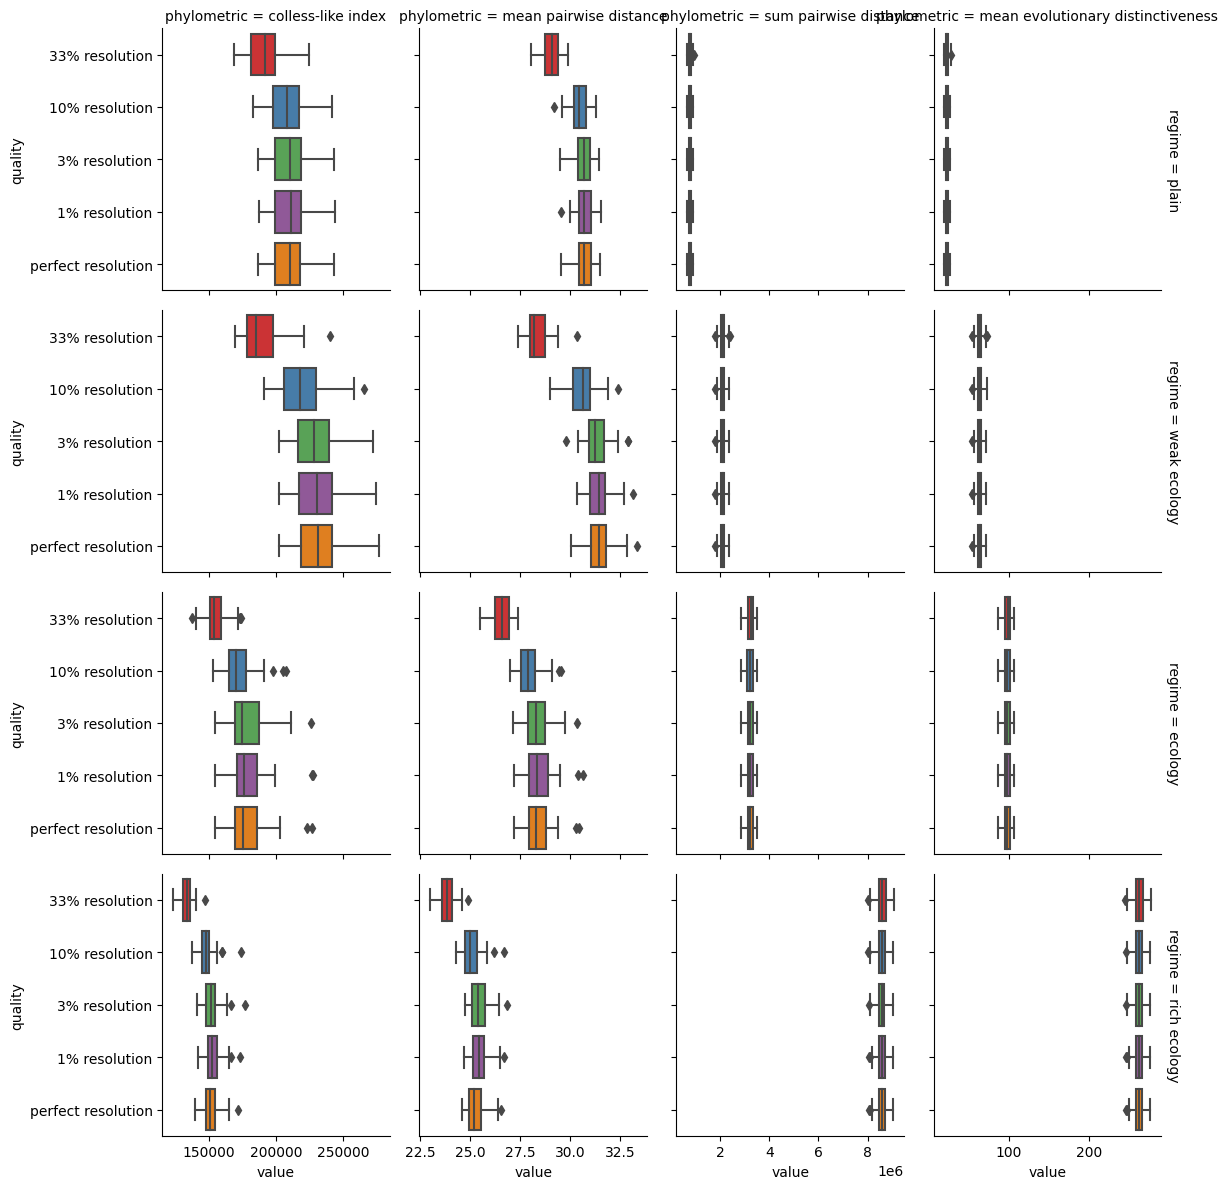

teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.png


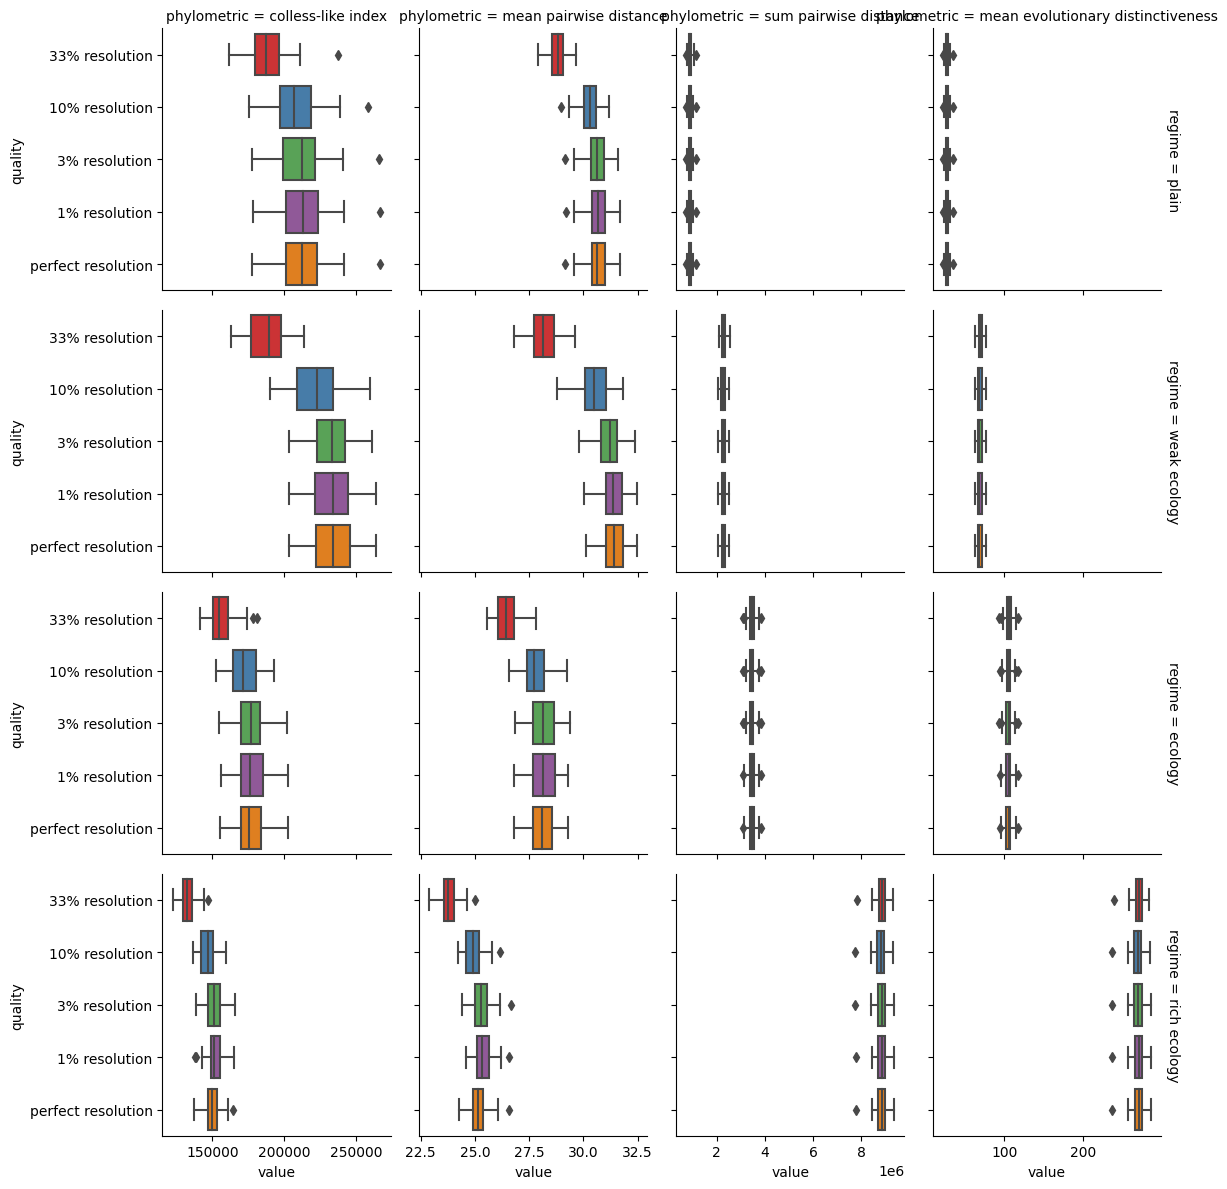

teeplots/col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.png


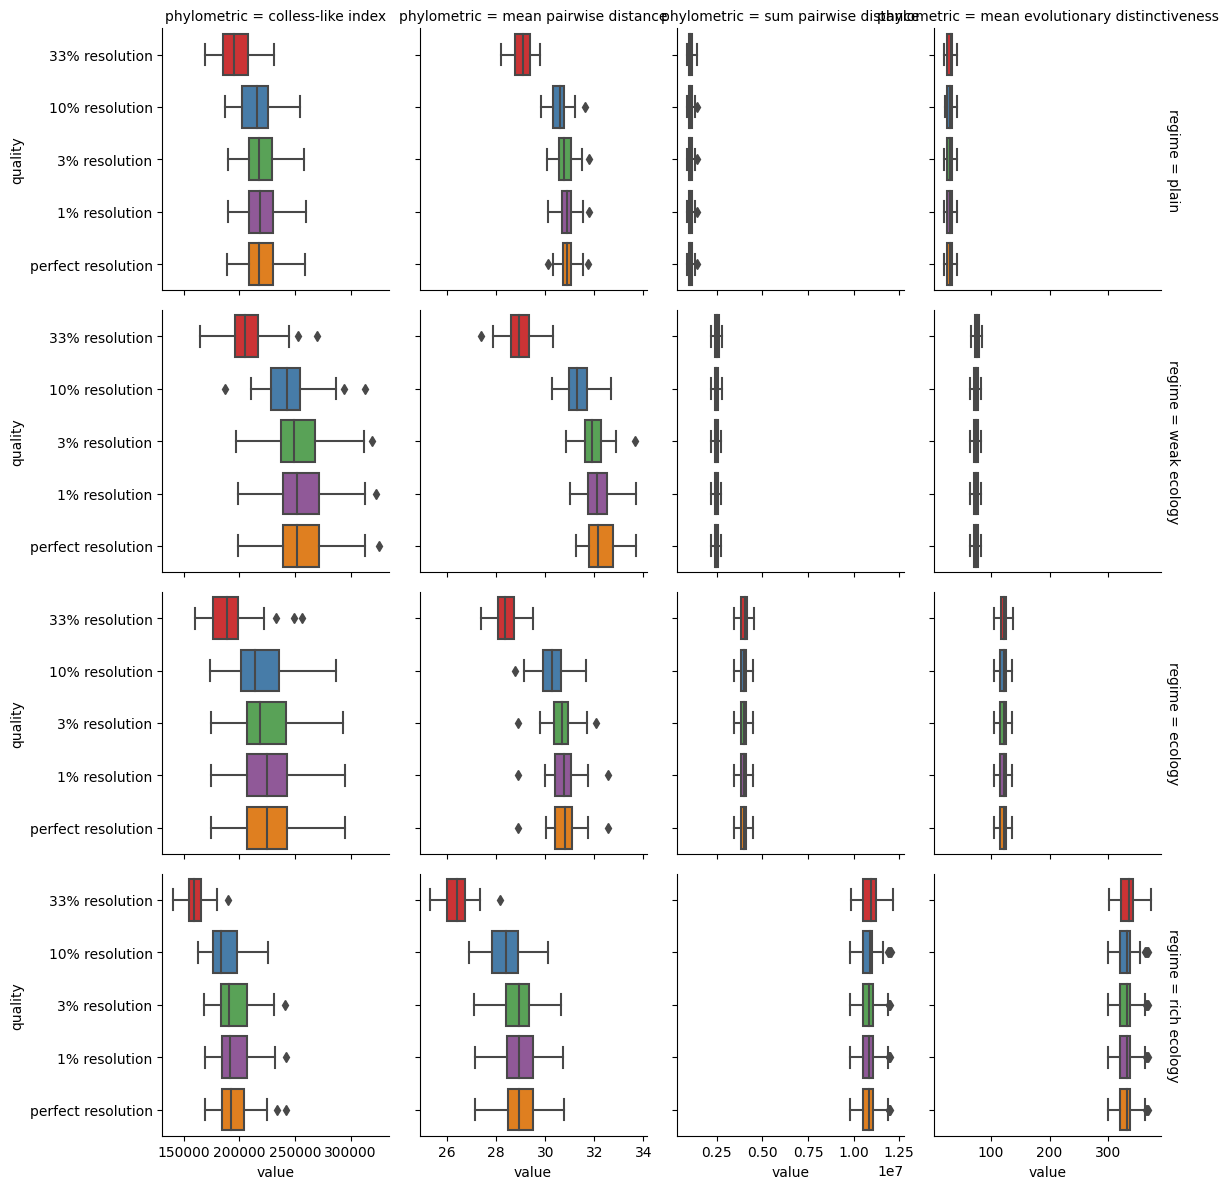

teeplots/col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.png


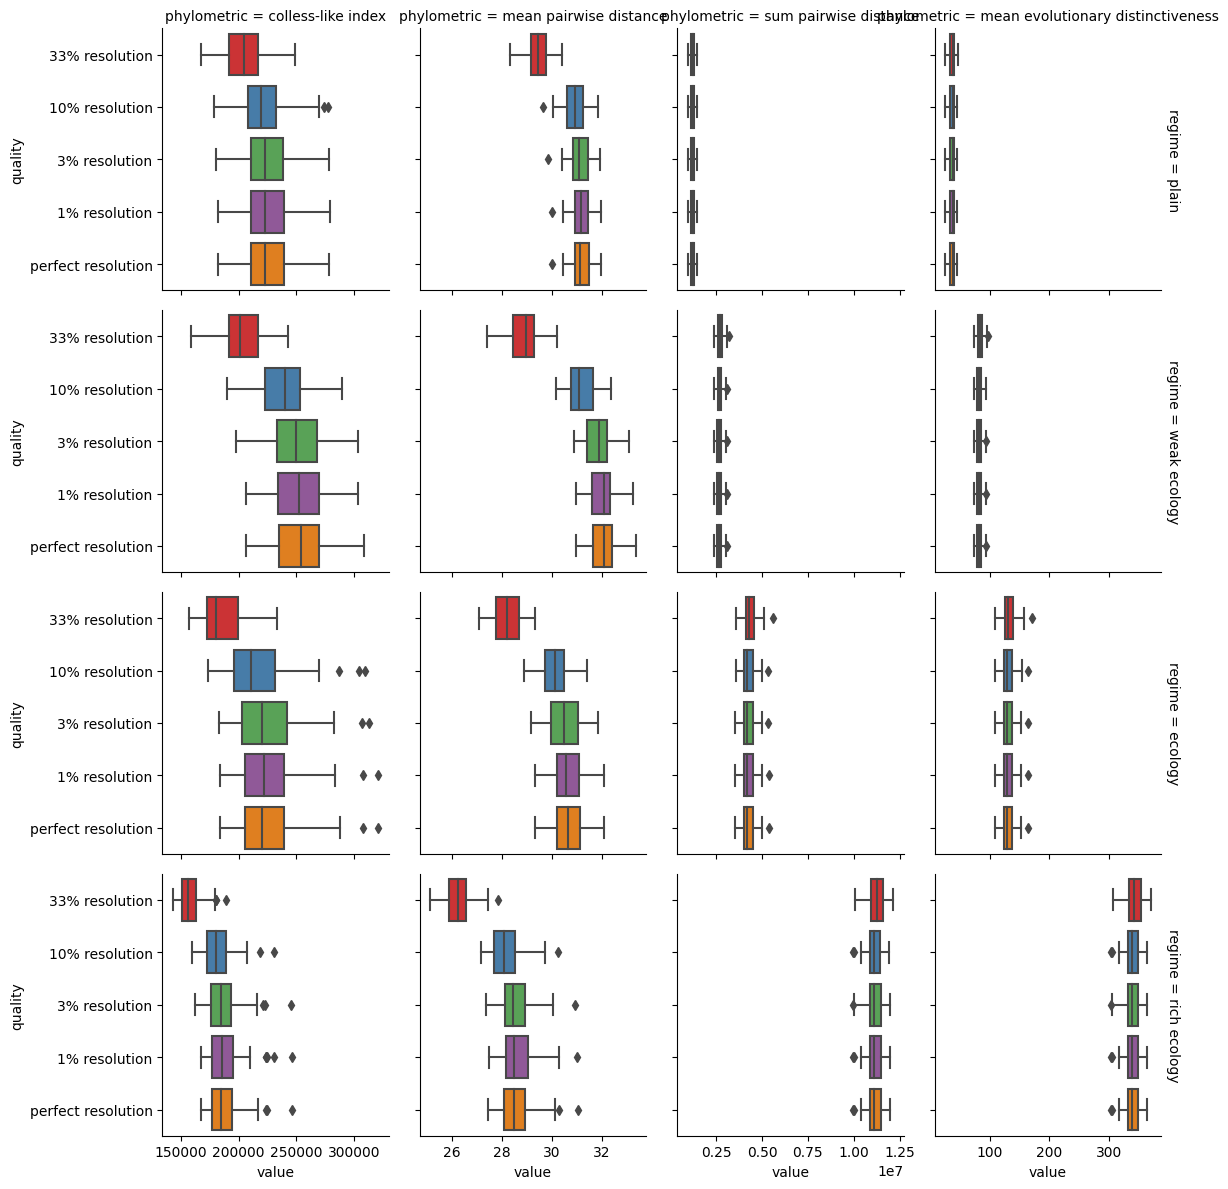

teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.png


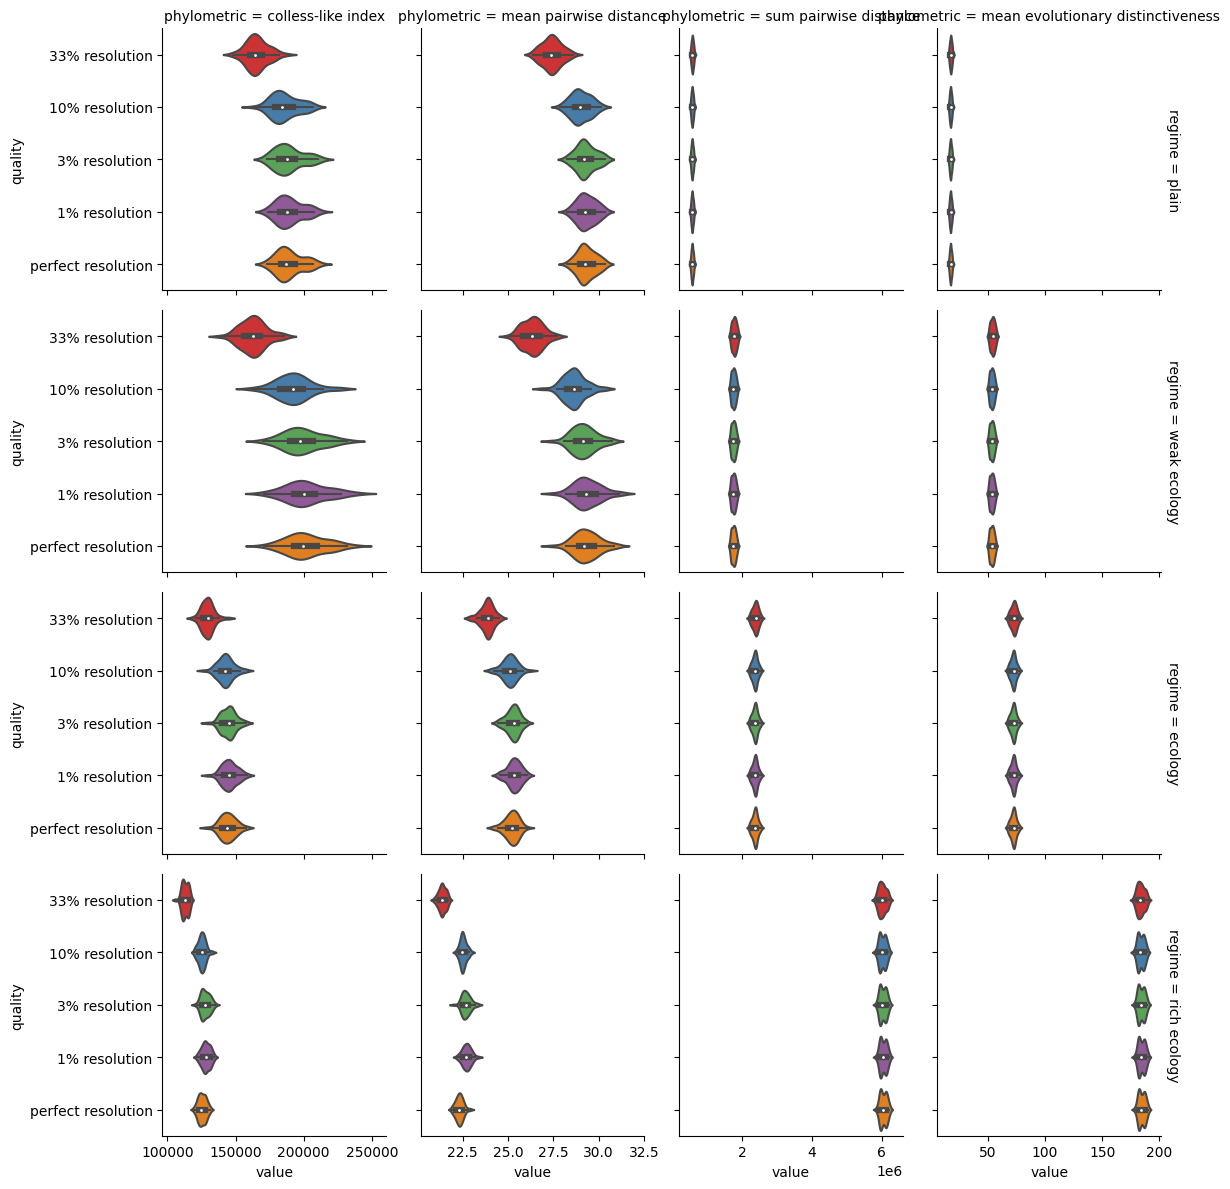

teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.png


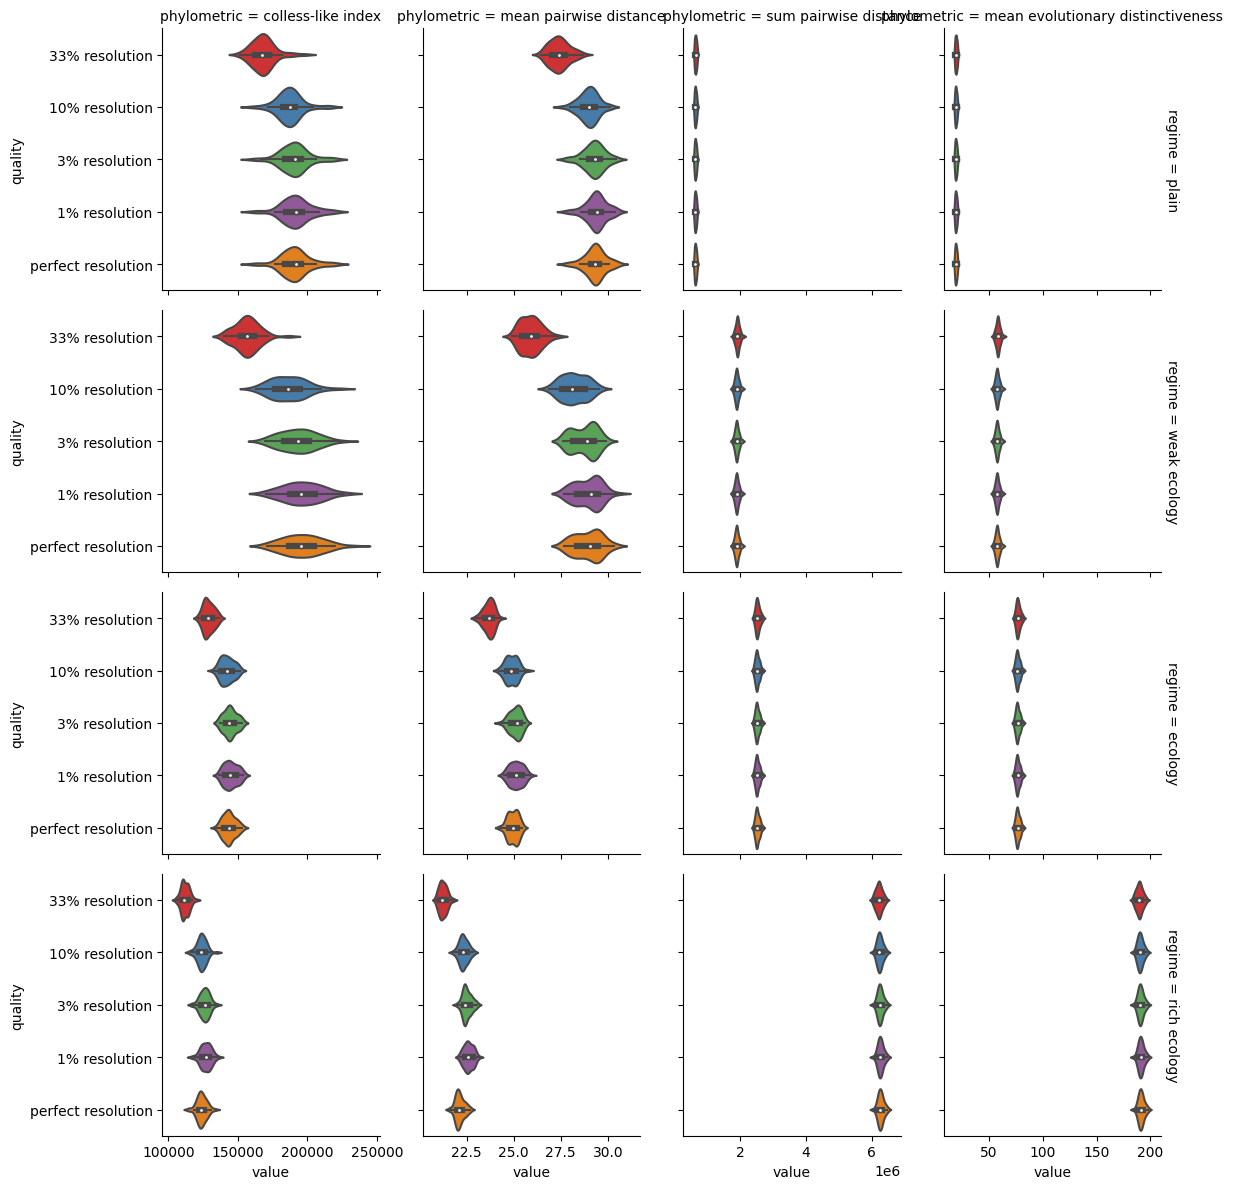

teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.png


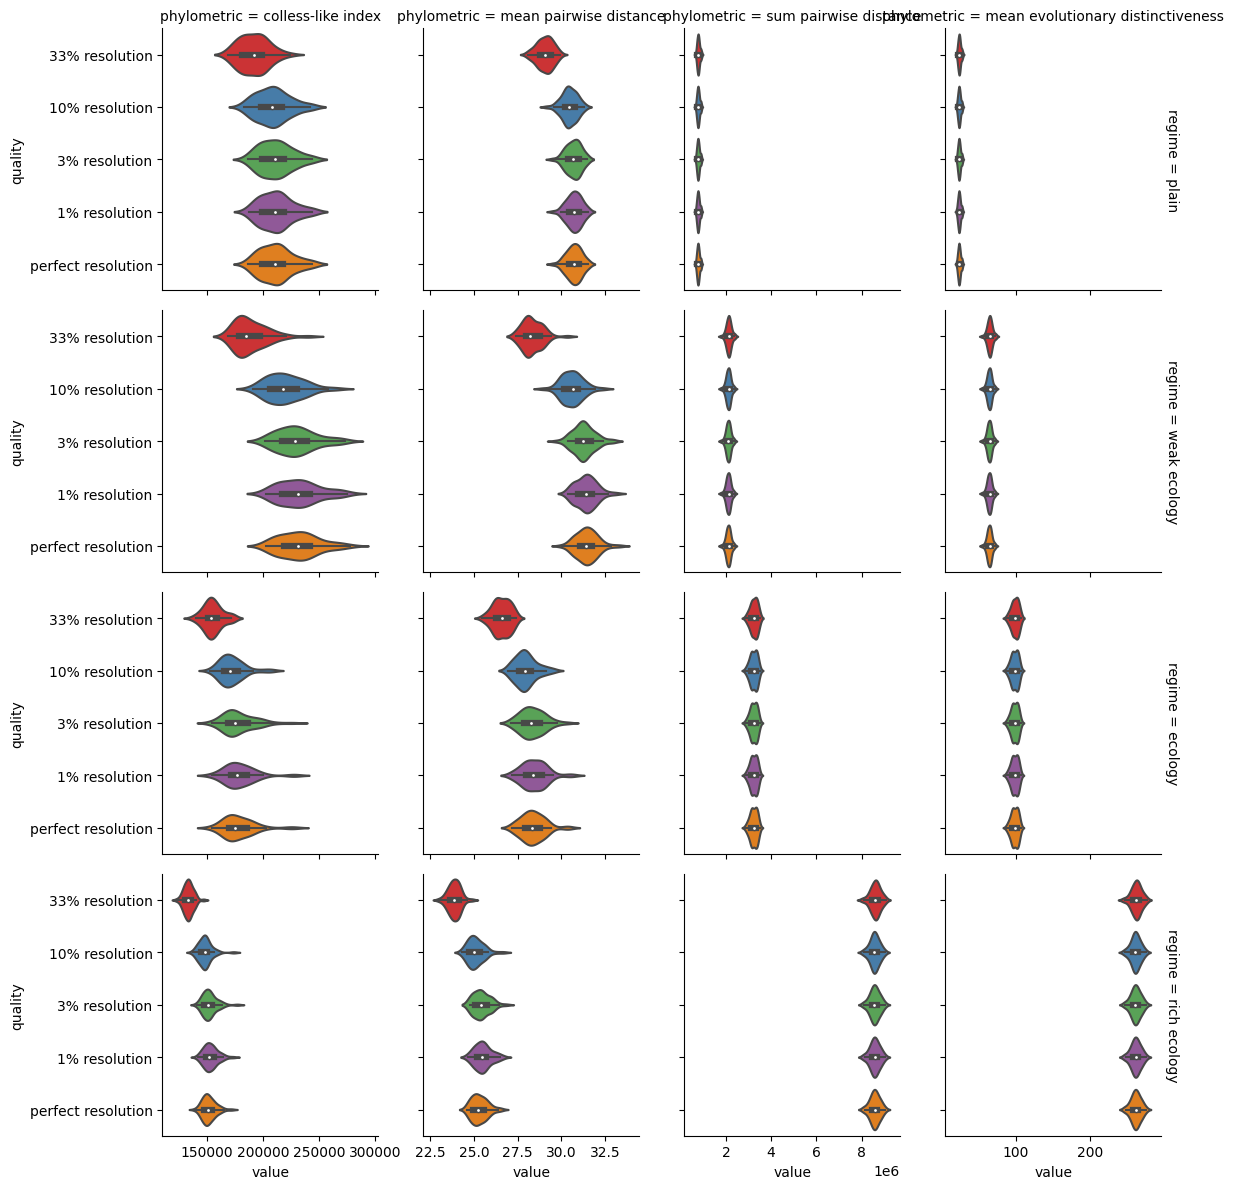

teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.png


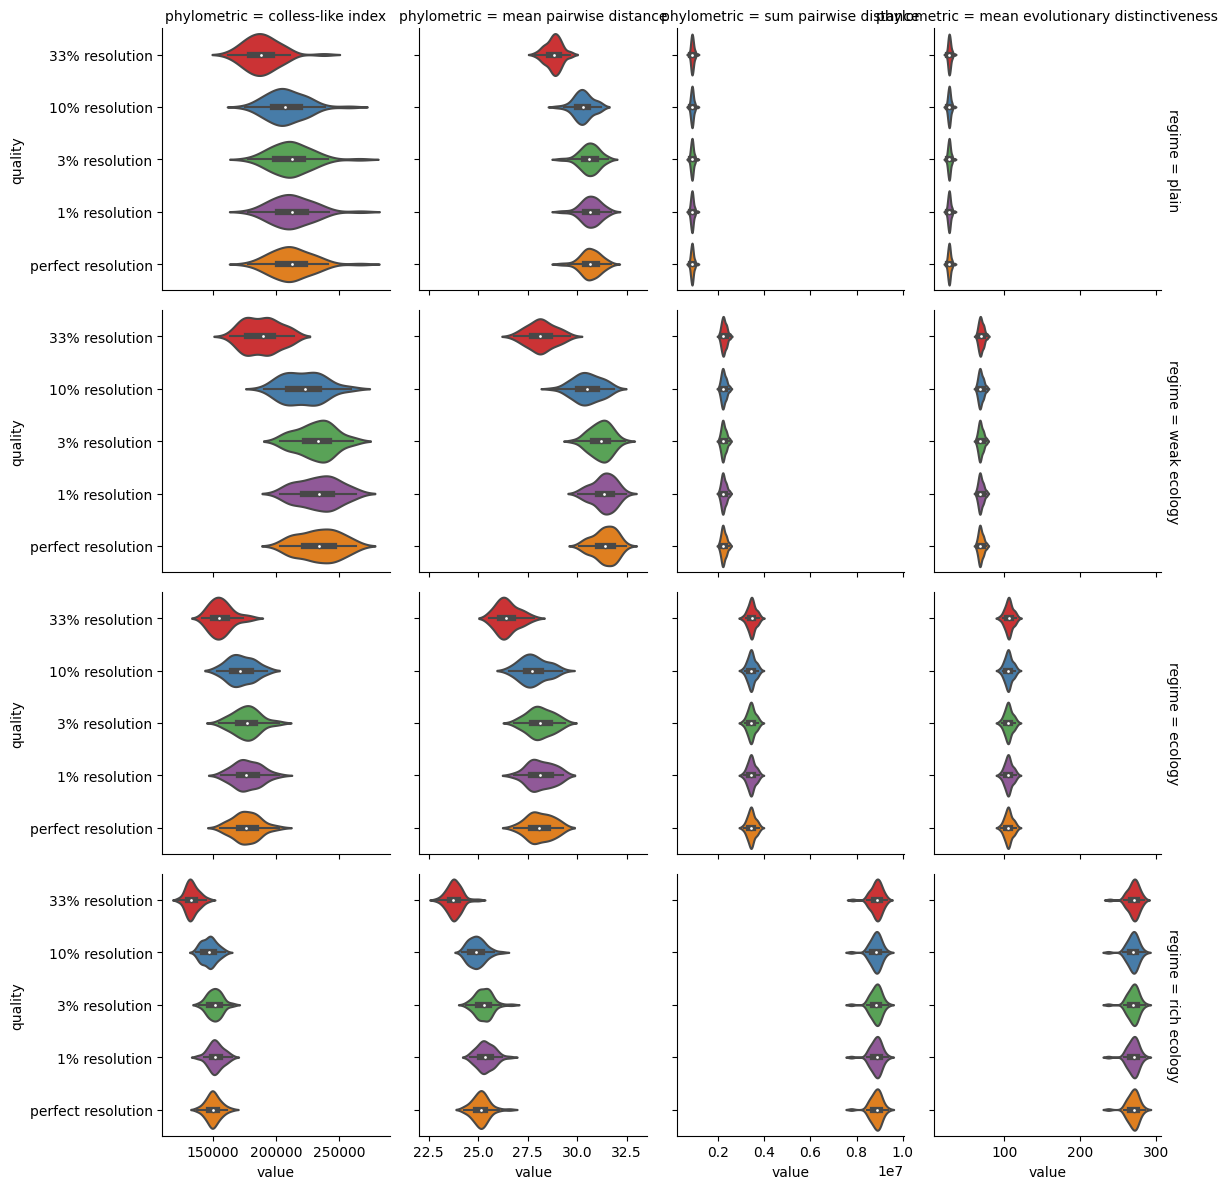

teeplots/col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.png


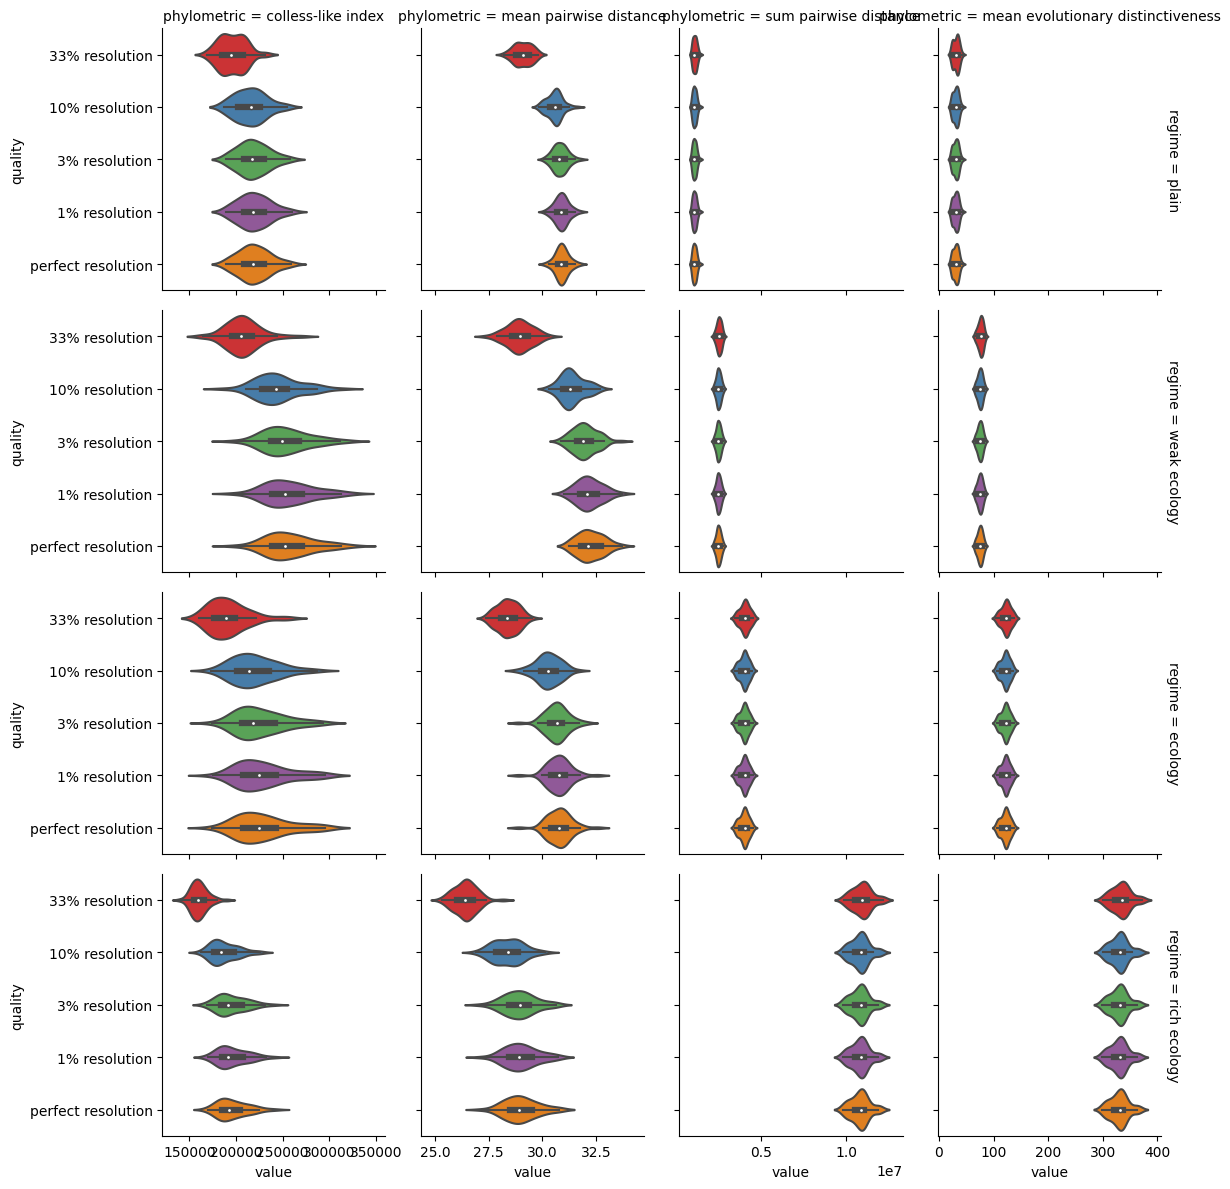

teeplots/col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.png


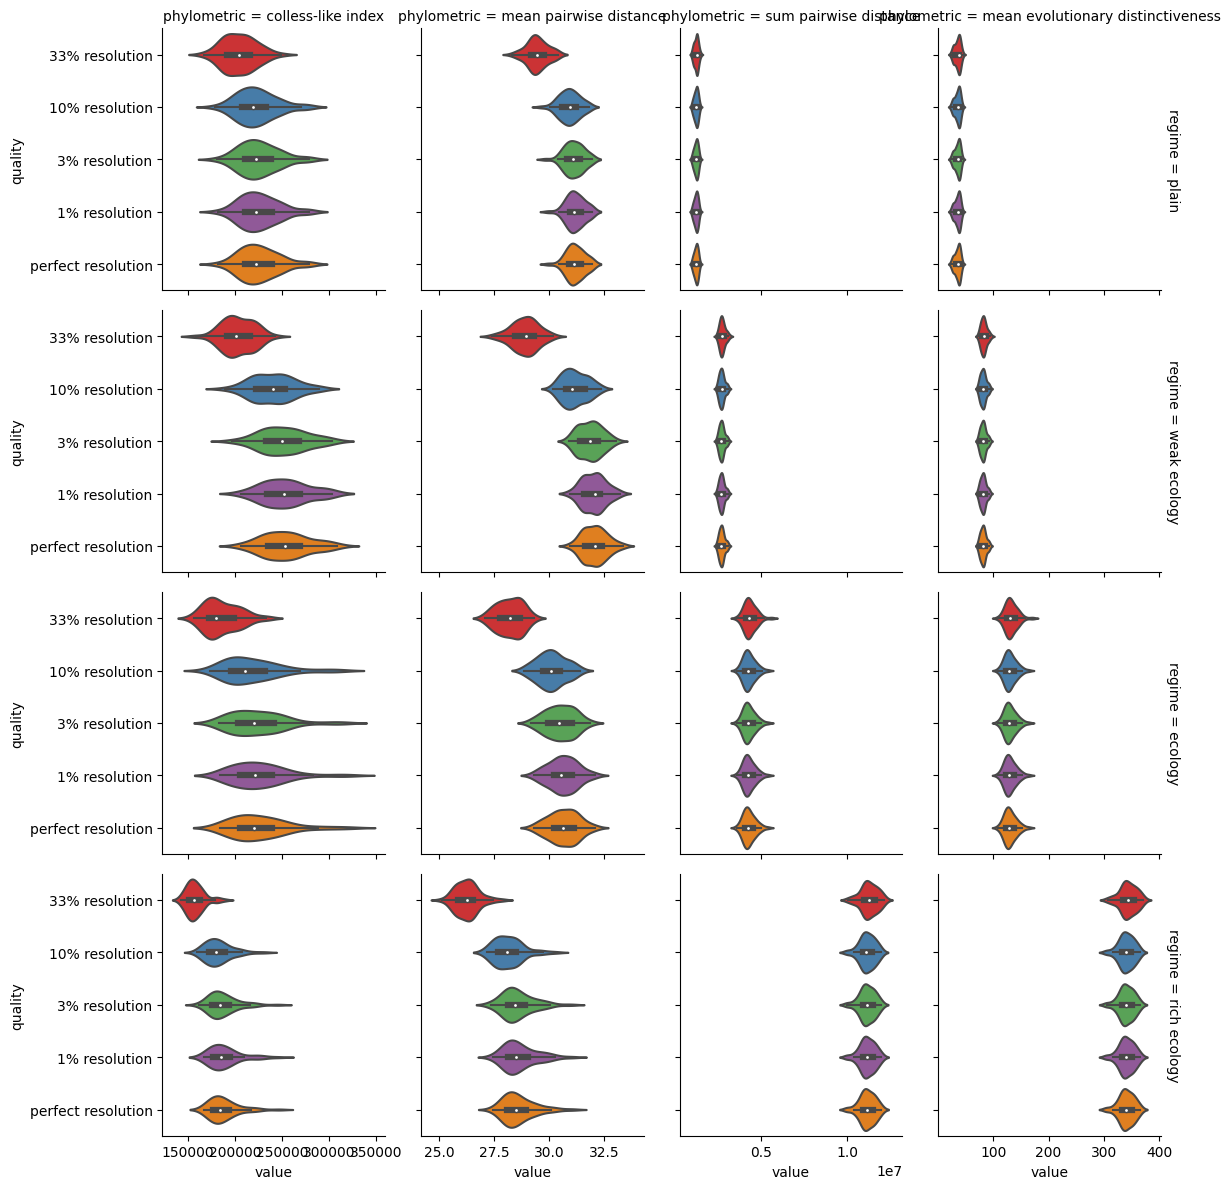

In [24]:
def make_do_plot(plotter):
    def do_plot(data, col, row, x, y):
        g = sns.FacetGrid(
            data,
            col=col,
            row=row,
            row_order=[
                "plain",
                "weak ecology",
                "ecology",
                "rich ecology",
            ],
            sharex="col",
            margin_titles=True,
        ).set_titles(template="{col_name}")
        g.map(
            plotter,
            x,
            y,
            order=[
                "33% resolution",
                "10% resolution",
                "3% resolution",
                "1% resolution",
                "perfect resolution",
            ],
            palette=sns.color_palette("Set1", 5),
        )

    return do_plot


for viz, (group, group_df) in it.product(
    [
        sns.barplot,
        sns.boxplot,
        sns.violinplot,
    ],
    melted_df.groupby(sensitivity_analysis_variables),
):
    do_plot = make_do_plot(viz)
    do_plot.__name__ = viz.__name__
    tp.tee(
        do_plot,
        data=group_df,
        col="phylometric",
        row="regime",
        x="value",
        y="quality",
        teeplot_outattrs={
            **{
                "nuisance": "spatial-structure",
            },
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
        },
    )


# stats: comparison against perfect


In [25]:
records = []
for phylometric in phylometrics:
    for group, group_df in df.groupby(
        ["regime", *sensitivity_analysis_variables], as_index=False
    ):
        for quality in group_df["quality"].unique():
            if quality == "perfect resolution":
                continue
            kw_result, n = scipy_stats.wilcoxon(
                *zip(
                    *zip(
                        group_df[group_df["quality"] == "perfect resolution"][
                            phylometric
                        ],
                        group_df[group_df["quality"] == quality][phylometric],
                    )
                ),
            ), min(group_df.groupby(["quality"]).count()["a"])
            records.append(
                {
                    **{"quality": quality, "n": n, "phylometric": phylometric},
                    **dict(zip(["statistic", "p"], kw_result)),
                    **dict(
                        zip(["regime", *sensitivity_analysis_variables], group)
                    ),
                }
            )

with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    out_df = (
        pd.DataFrame.from_records(records)
        .sort_values(
            [*sensitivity_analysis_variables, "regime", "phylometric"],
        )
        .reset_index(drop=True)
    )
    display(out_df)
    os.makedirs("outdata", exist_ok=True)
    out_df.to_csv(
        "outdata/a=phylostatistics-comparison-between-resolutions-allpairs-wilcox-spatial-nuisance+ext=.csv",
        index=False,
    )


quality   n                        phylometric  statistic  \
0    33% resolution  50                 colless-like index        1.0   
1    10% resolution  50                 colless-like index      497.0   
2     1% resolution  50                 colless-like index      559.0   
3     3% resolution  50                 colless-like index      602.0   
4    33% resolution  50  mean evolutionary distinctiveness      514.0   
5    10% resolution  50  mean evolutionary distinctiveness      606.0   
6     1% resolution  50  mean evolutionary distinctiveness      631.0   
7     3% resolution  50  mean evolutionary distinctiveness      579.0   
8    33% resolution  50             mean pairwise distance        0.0   
9    10% resolution  50             mean pairwise distance      482.0   
10    1% resolution  50             mean pairwise distance      465.0   
11    3% resolution  50             mean pairwise distance      560.0   
12   33% resolution  50              sum pairwise distance      514.0   
13   10% resolution  50              sum pairwise distance      606.0   
14    1% resolution  50              sum pairwise distance      631.0   
15    3% resolution  50              sum pairwise distance      579.5   
16   33% resolution  50                 colless-like index        1.0   
17   10% resolution  50                 colless-like index      467.0   
18    3% resolution  50                 colless-like index      632.0   
19    1% resolution  50                 colless-like index      619.0   
20   33% resolution  50  mean evolutionary distinctiveness      556.0   
21   10% resolution  50  mean evolutionary distinctiveness      634.0   
22    3% resolution  50  mean evolutionary distinctiveness      607.0   
23    1% resolution  50  mean evolutionary distinctiveness      613.0   
24   33% resolution  50             mean pairwise distance        0.0   
25   10% resolution  50             mean pairwise distance      373.0   
26    3% resolution  50             mean pairwise distance      603.0   
27    1% resolution  50             mean pairwise distance      618.0   
28   33% resolution  50              sum pairwise distance      556.0   
29   10% resolution  50              sum pairwise distance      634.0   
30    3% resolution  50              sum pairwise distance      607.0   
31    1% resolution  50              sum pairwise distance      613.0   
32   10% resolution  50                 colless-like index      555.0   
33    1% resolution  50                 colless-like index      243.0   
34   33% resolution  50                 colless-like index        0.0   
35    3% resolution  50                 colless-like index      255.0   
36   10% resolution  50  mean evolutionary distinctiveness      511.0   
37    1% resolution  50  mean evolutionary distinctiveness      632.0   
38   33% resolution  50  mean evolutionary distinctiveness      486.0   
39    3% resolution  50  mean evolutionary distinctiveness      563.0   
40   10% resolution  50             mean pairwise distance      155.0   
41    1% resolution  50             mean pairwise distance       49.0   
42   33% resolution  50             mean pairwise distance        0.0   
43    3% resolution  50             mean pairwise distance       43.0   
44   10% resolution  50              sum pairwise distance      511.0   
45    1% resolution  50              sum pairwise distance      632.0   
46   33% resolution  50              sum pairwise distance      486.0   
47    3% resolution  50              sum pairwise distance      563.0   
48    3% resolution  50                 colless-like index      573.0   
49    1% resolution  50                 colless-like index      636.0   
50   10% resolution  50                 colless-like index      327.0   
51   33% resolution  50                 colless-like index        0.0   
52    3% resolution  50  mean evolutionary distinctiveness      612.0   
53    1% resolution  50  mean evolutionary distinctiveness      613.0 

# error signficance heatmap


teeplots/epoch=0+hue=quality-threshold+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=0+hue=quality-threshold+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.png


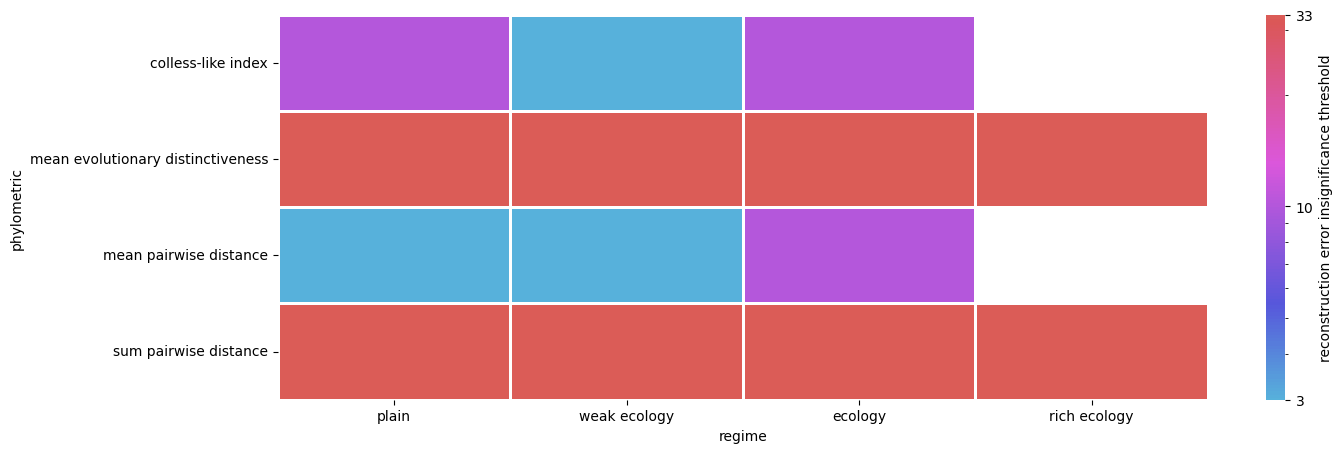

teeplots/epoch=0+hue=quality-threshold+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=0+hue=quality-threshold+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.png


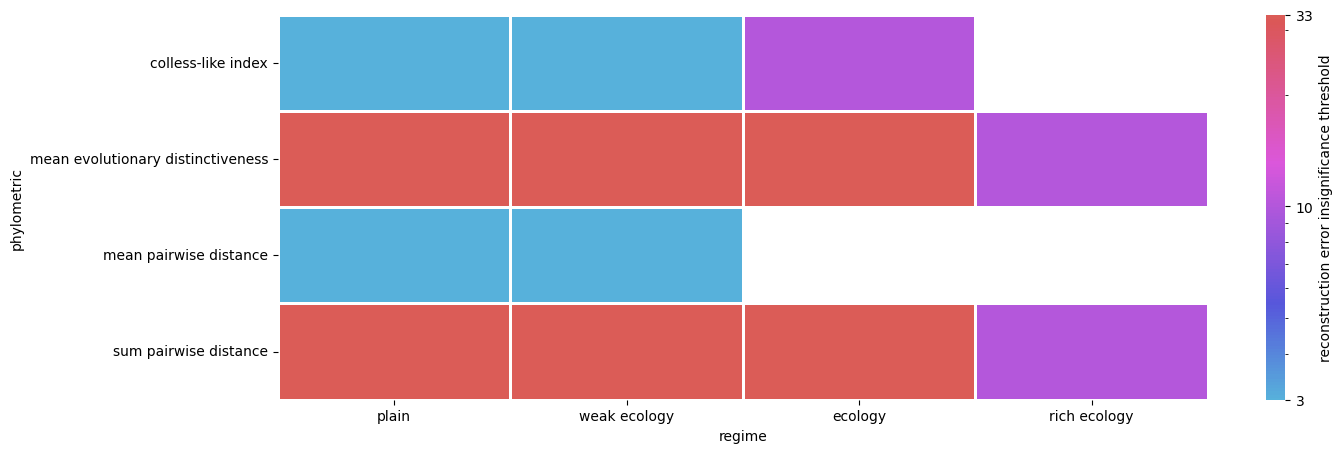

teeplots/epoch=2+hue=quality-threshold+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=2+hue=quality-threshold+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.png


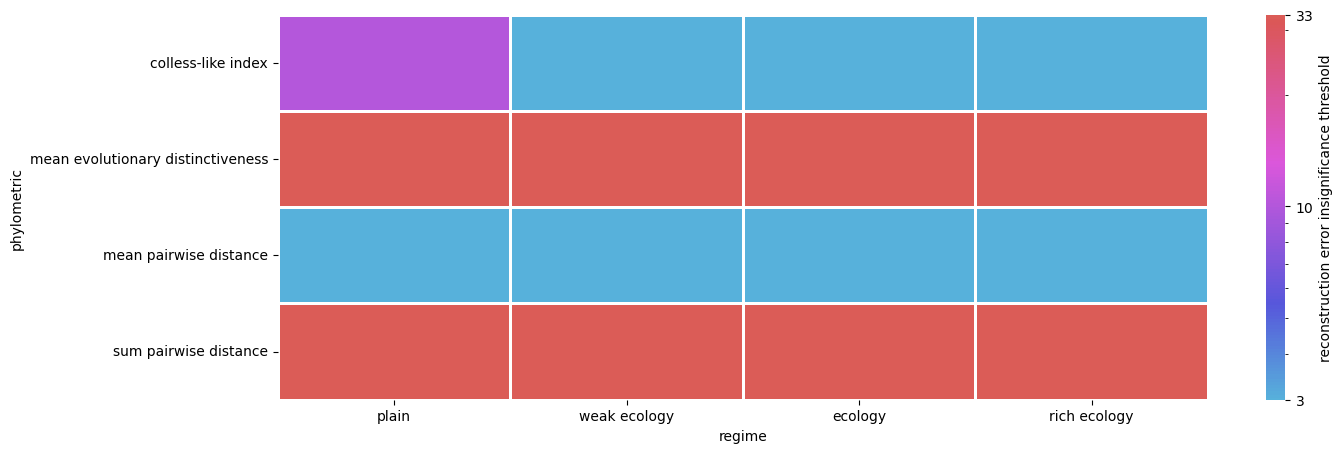

teeplots/epoch=2+hue=quality-threshold+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=2+hue=quality-threshold+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.png


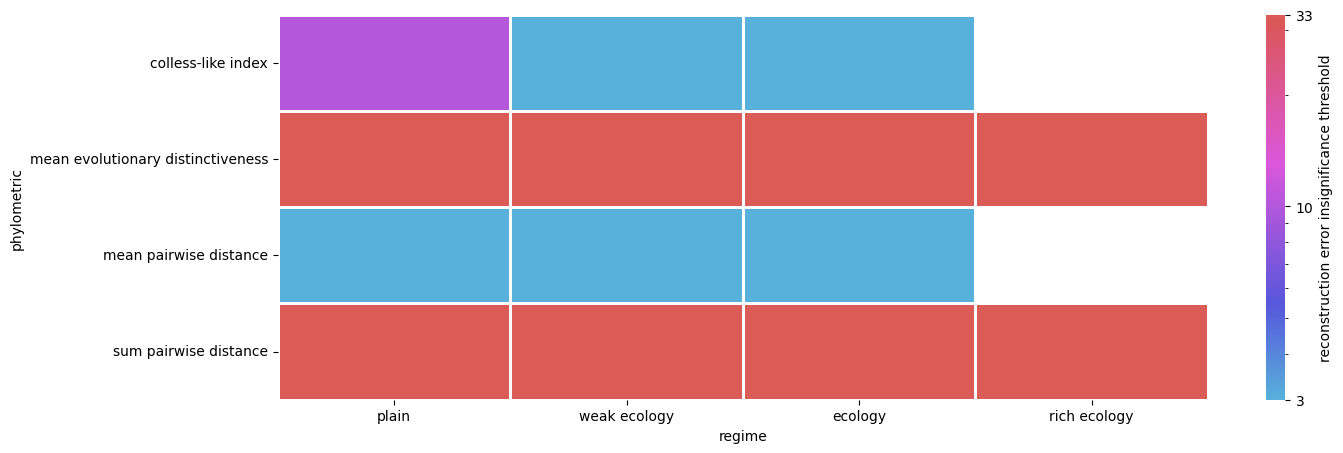

teeplots/epoch=7+hue=quality-threshold+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=7+hue=quality-threshold+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.png


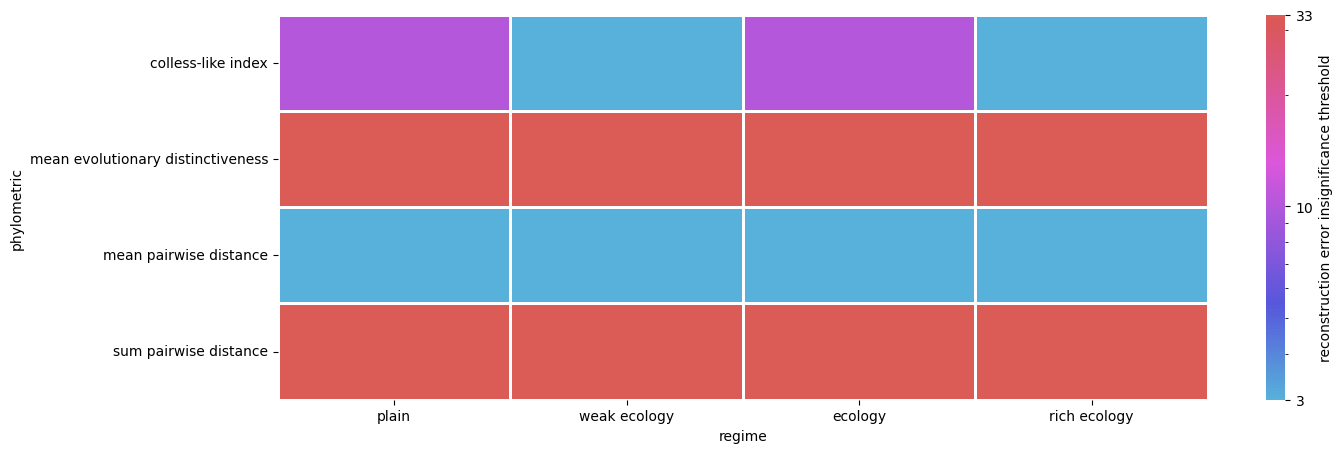

teeplots/epoch=7+hue=quality-threshold+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=7+hue=quality-threshold+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.png


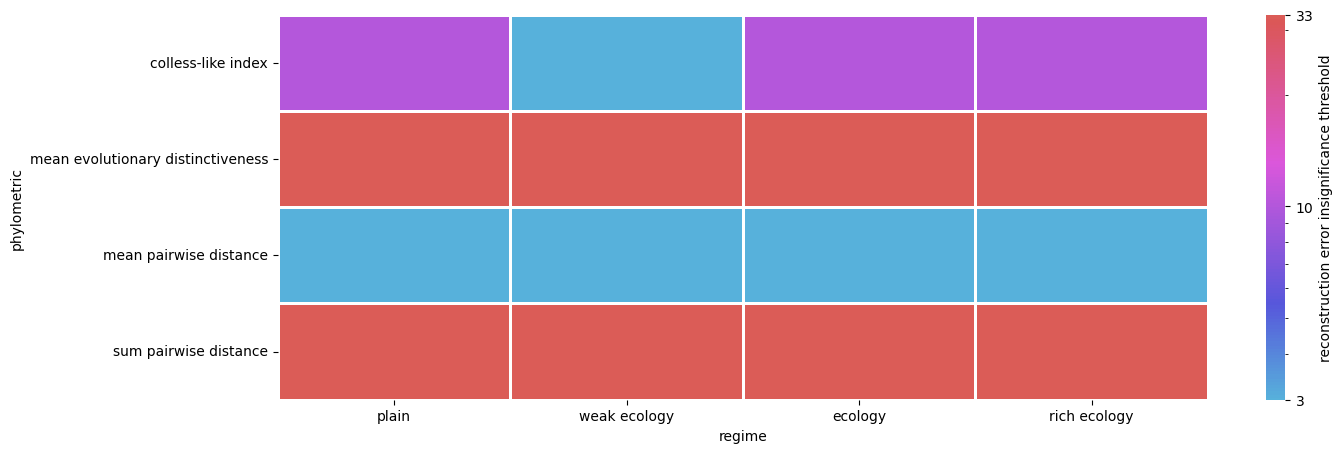

regime                        phylometric  quality threshold  epoch  \
0        ecology                 colless-like index                 10      7   
1        ecology  mean evolutionary distinctiveness                 33      7   
2        ecology             mean pairwise distance                  3      7   
3        ecology              sum pairwise distance                 33      7   
4          plain                 colless-like index                 10      7   
5          plain  mean evolutionary distinctiveness                 33      7   
6          plain             mean pairwise distance                  3      7   
7          plain              sum pairwise distance                 33      7   
8   rich ecology                 colless-like index                 10      7   
9   rich ecology  mean evolutionary distinctiveness                 33      7   
10  rich ecology             mean pairwise distance                  3      7   
11  rich ecology              sum pairwise distance                 33      7   
12  weak ecology                 colless-like index                  3      7   
13  weak ecology  mean evolutionary distinctiveness                 33      7   
14  weak ecology             mean pairwise distance                  3      7   
15  weak ecology              sum pairwise distance                 33      7   

                    mut_distn  
0   np.random.standard_normal  
1   np.random.standard_normal  
2   np.random.standard_normal  
3   np.random.standard_normal  
4   np.random.standard_normal  
5   np.random.standard_normal  
6   np.random.standard_normal  
7   np.random.standard_normal  
8   np.random.standard_normal  
9   np.random.standard_normal  
10  np.random.standard_normal  
11  np.random.standard_normal  
12  np.random.standard_normal  
13  np.random.standard_normal  
14  np.random.standard_normal  
15  np.random.standard_normal

In [26]:
for group, group_df in out_df.groupby(
    sensitivity_analysis_variables, as_index=False
):
    group_df["quality threshold"] = group_df["quality"]
    group_df.loc[group_df["p"] > 0.05, "quality threshold"] = ""
    summarized_df = (
        group_df.groupby(["regime", "phylometric"])
        .agg(
            {
                "quality threshold": lambda subgroup: (
                    np.nan
                    if "1% resolution" in set(subgroup)
                    else 1
                    if "3% resolution" in set(subgroup)
                    else 3
                    if "10% resolution" in set(subgroup)
                    else 10
                    if "33% resolution" in set(subgroup)
                    else 33
                ),
                "epoch": lambda subgroup: ip.pophomogeneous(subgroup),
                "mut_distn": lambda subgroup: ip.pophomogeneous(subgroup),
            }
        )
        .reset_index()
    )

    matrix = summarized_df.pivot(
        index="phylometric",
        columns="regime",
        values="quality threshold",
    )
    matrix = matrix[
        sorted(
            matrix.columns,
            key=[
                "plain",
                "weak selection",
                "strong selection",
                "spatial structure",
                "weak ecology",
                "ecology",
                "rich ecology",
            ].index,
        )
    ]

    fig, ax = plt.subplots(figsize=(15, 5))
    formatter = mpl.ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    tp.tee(
        sns.heatmap,
        matrix,
        linewidths=2,
        norm=mpl.colors.LogNorm(),
        cmap=sns.color_palette("hls", as_cmap=True),
        center=0,
        cbar_kws={
            "label": "reconstruction error insignificance threshold",
            "ticks": [1, 3, 10, 33],
            "format": formatter,
        },
        teeplot_outattrs={
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
            **{
                "nuisance": "spatial-structure",
                "hue": "quality-threshold",
                "x": "regime",
                "y": "phylometric",
            },
        },
    )

summarized_df
